*   Patel Samarth Rajeshkumar : B21CS057

*   Ved Brahmbhatt : B21EE075

*   Somshuvra Basu : B21EE069

# **Importing Necessary Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

# **Loading Dataset**


Documentation : 
*   As the dataset is too large to load from local machine, it is first uploaded in Google Drive then loaded.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')

# **Data Preprocessing and Exploratory Data Analysis**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)



*   Checking the datatype and name of all the features.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking numerical values in dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000




*   Checking if there are any null values in any feature of the dataset.



In [ ]:
#checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
print("The columns in the dataset are ", df.columns)

The columns in the dataset are  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')




*   Printing the distribution of the classes (Fraud and Non-Fraud).





In [ ]:
print("The number of fraud in the dataset are ", df['Class'].value_counts()[1]/len(df) * 100, " %.")
print("The number of non-fraud in the dataset are ", df['Class'].value_counts()[0]/len(df) * 100, " %.")

The number of fraud in the dataset are  0.1727485630620034  %.
The number of non-fraud in the dataset are  99.82725143693798  %.




*   Plotting the number of Fraud and Non-Fraud classes.



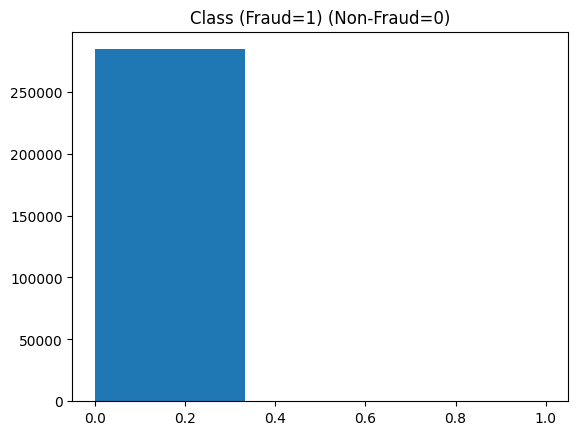

In [ ]:
plt.hist(df['Class'], bins=3)
plt.title("Class (Fraud=1) (Non-Fraud=0)")
plt.show()

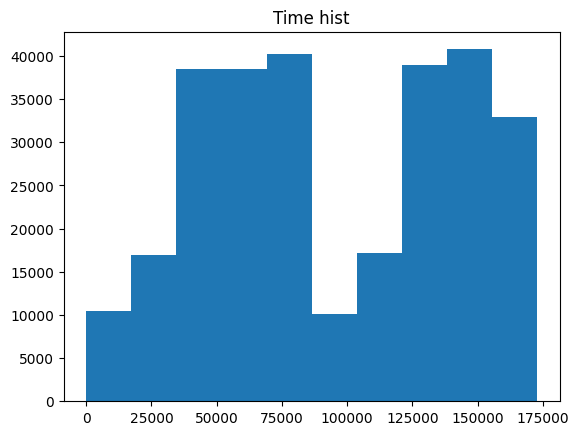

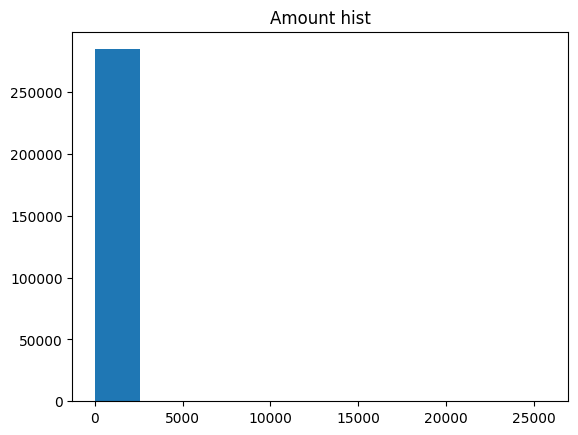

In [ ]:
plt.hist(df['Time'])
plt.title("Time hist")
plt.show()
plt.hist(df['Amount'])
plt.title("Amount hist")
plt.show()



*   Checking the distribution of all the features using histograms of all features.



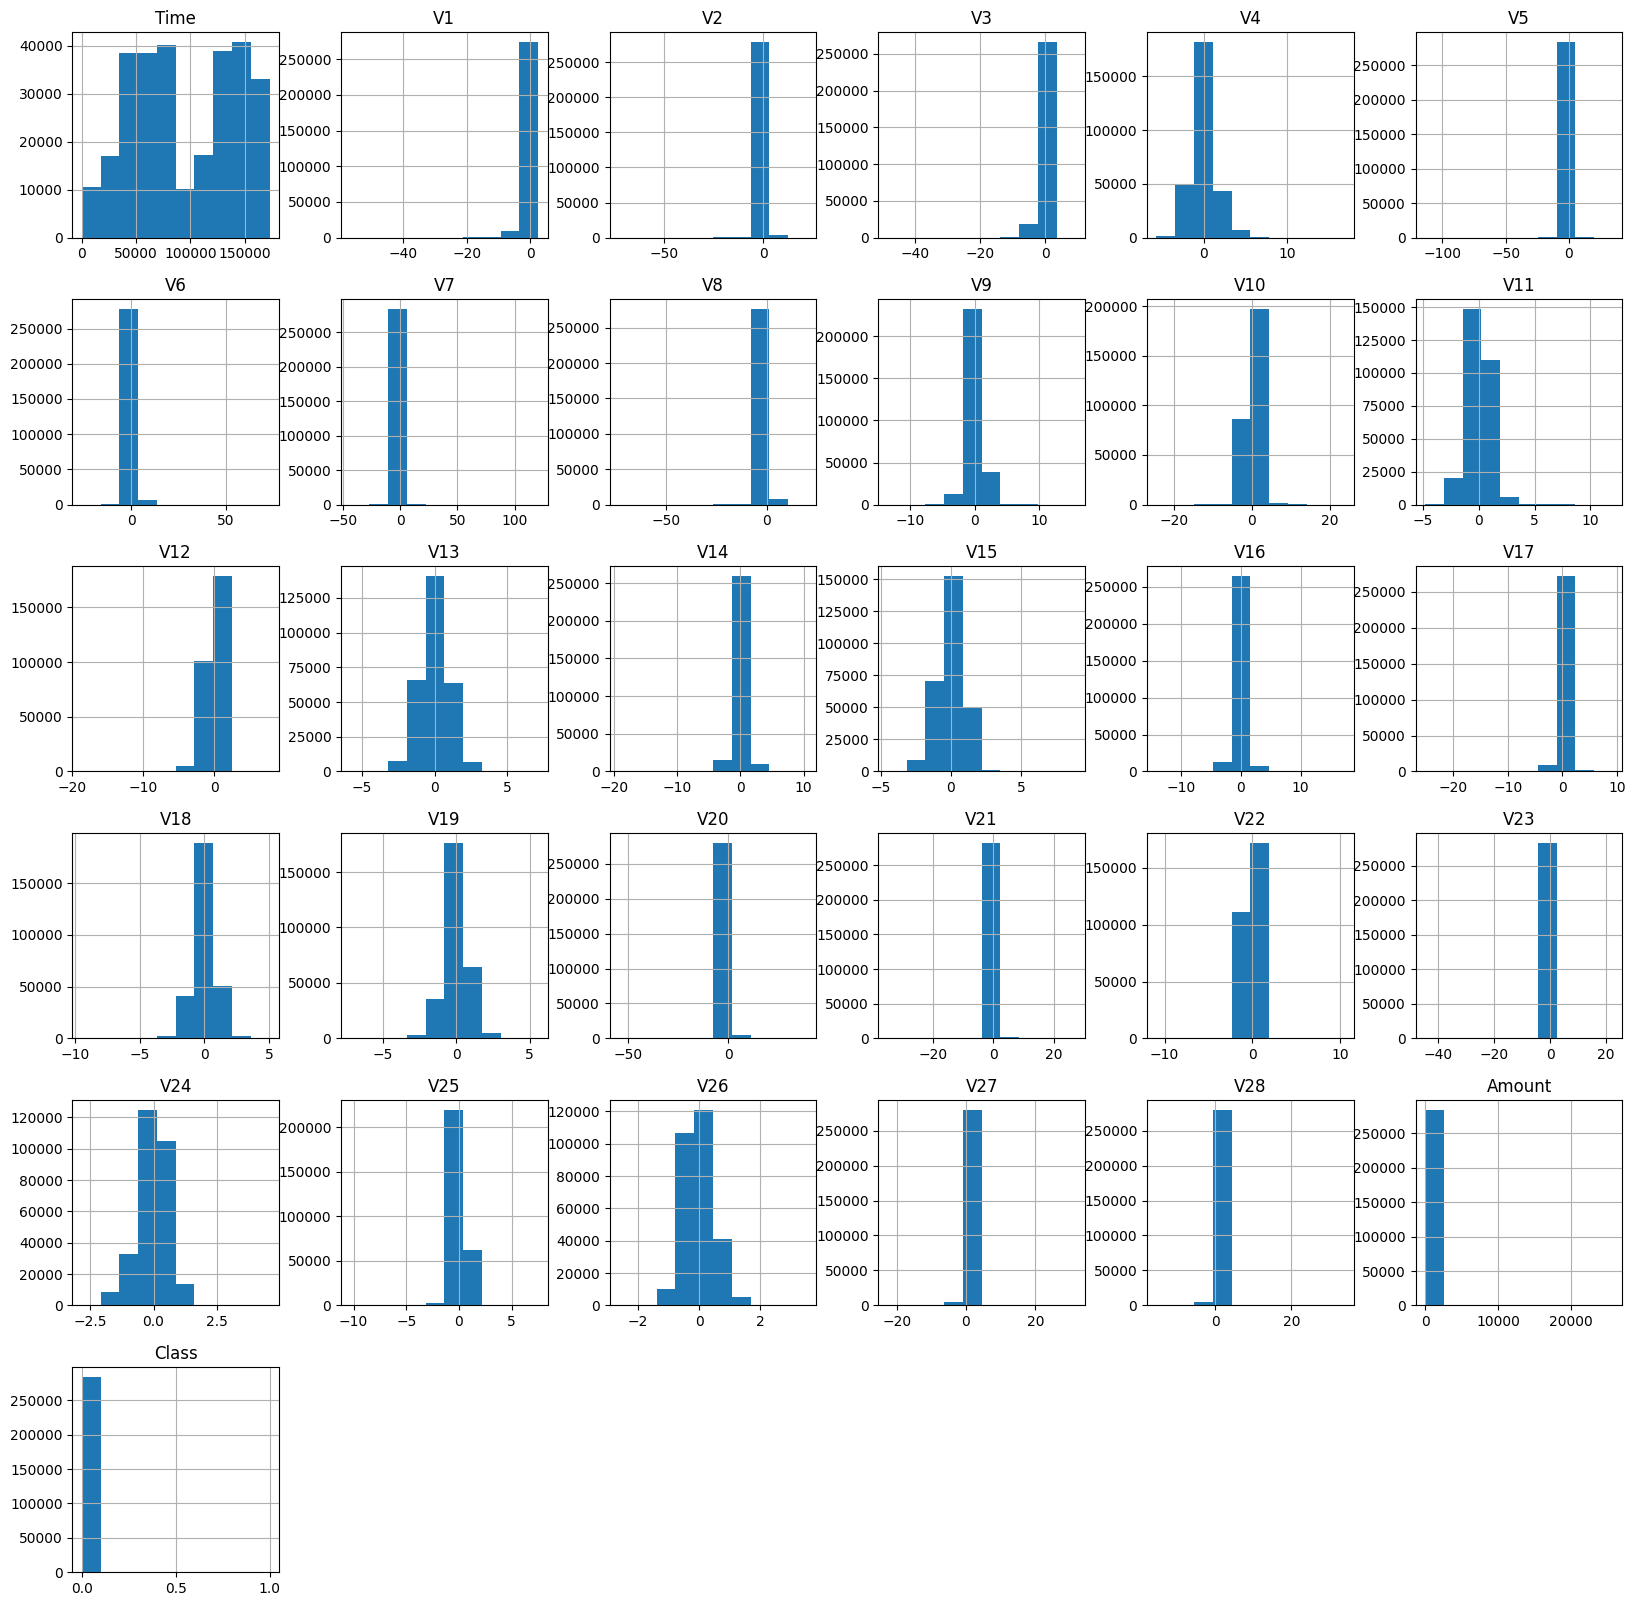

In [ ]:
df.hist(figsize=(20, 20))
plt.grid(False)
plt.show()


Documentation : 
*   As mentioned in Kaggle website for the dataset, that the Time and Amount features are not scaled, we first scaled them.
*   Robust Scaler for Time because it's distribution is non-gaussian and Standard Scaler for Amount because it appears to be skewed normal from the histograms.



In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
standard_scaler.fit(df['Amount'].values.reshape(-1,1))
robust_scaler.fit(df['Time'].values.reshape(-1,1))

RobustScaler()

In [ ]:
df['Amount'] = standard_scaler.transform(df['Amount'].values.reshape(-1,1))
df['Time'] = robust_scaler.transform(df['Time'].values.reshape(-1,1))

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


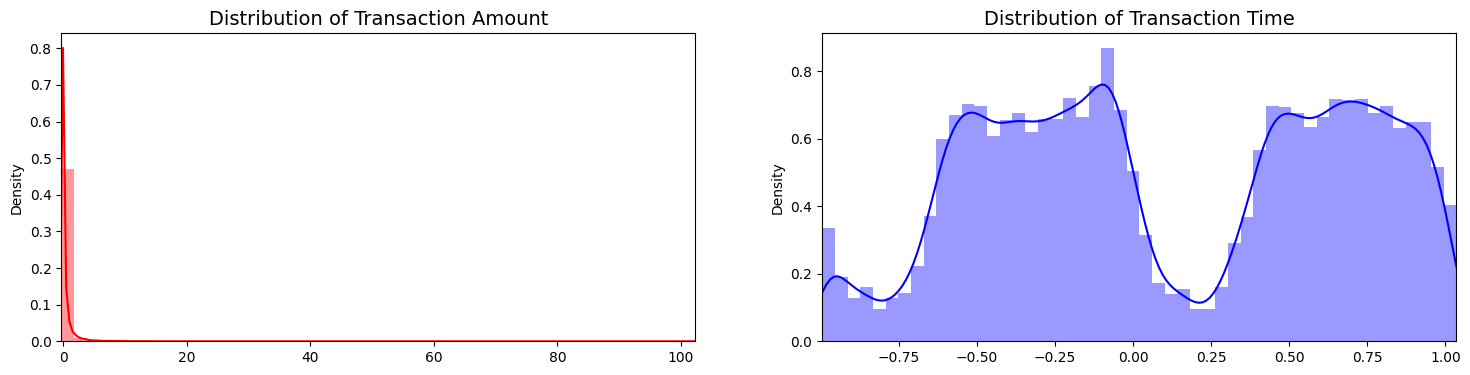

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['Amount'].values
time_val = df['Time'].values
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()



*   Plotting the correlation between all the feautures using seaborn library.



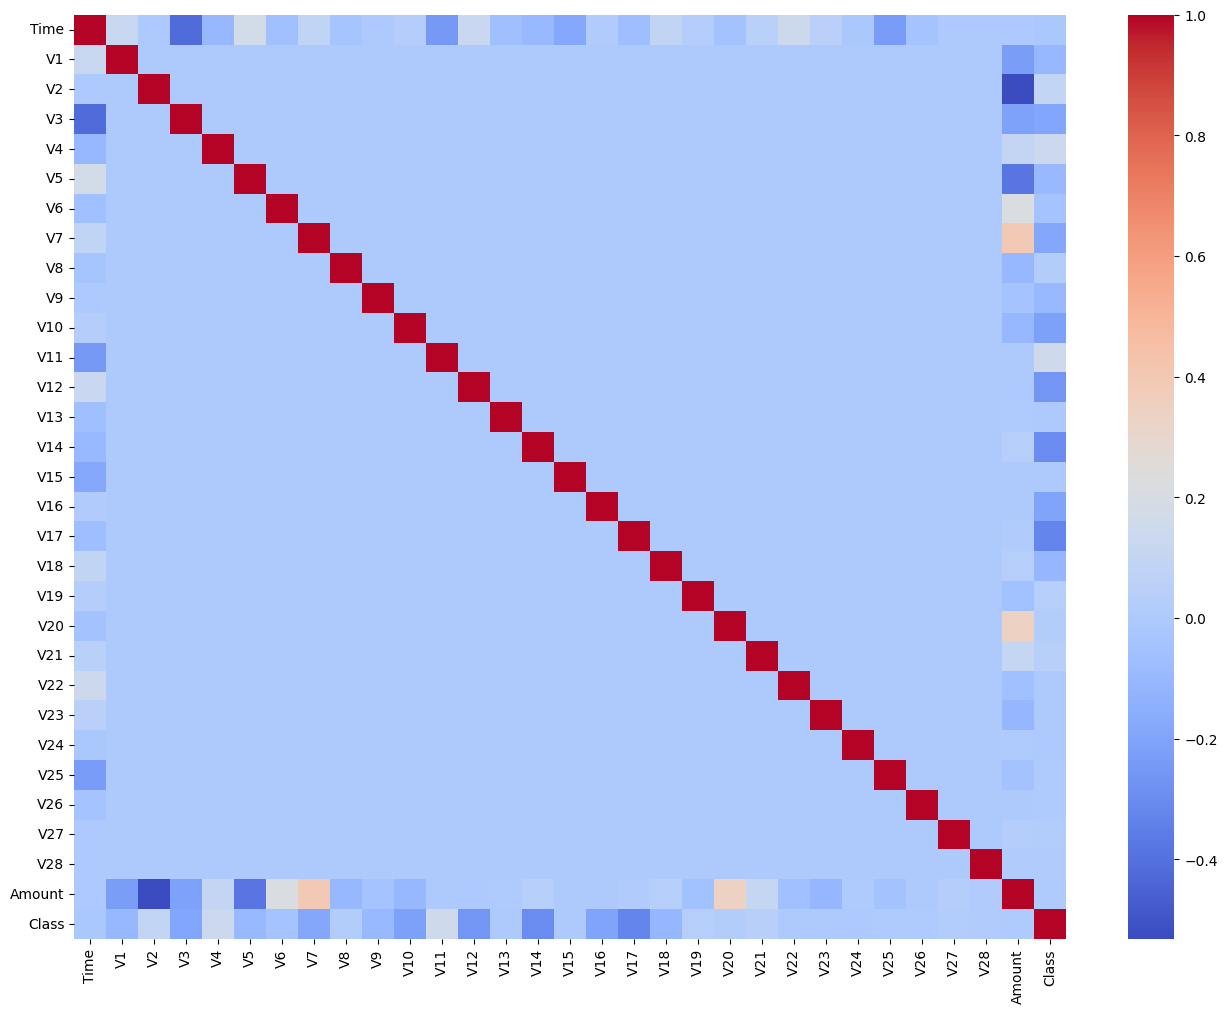

In [ ]:
correlation=df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation,cmap='coolwarm',annot=False)
plt.show()



*   Dividing the dataset into dependent (X) and independent (y) variables.
*   Then splitting the dataset into training and testing dataset. 

Note : stratify=y is used in train_test_split because we need to maintain the ratio of fraud cases in train and test dataset, as the dataset is higly imbalanced.



In [ ]:
y=df['Class']
X=df.drop(['Class'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("The number of fraud samples in y_train are ", sum(y_train == 1))
print("The number of fraud samples in y_test are ", sum(y_test == 1))

The number of fraud samples in y_train are  394
The number of fraud samples in y_test are  98


In [ ]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,0.893667,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.261273
11378,-0.761816,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.305852
147283,0.042693,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.049095
219439,0.670144,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.349271
36939,-0.539844,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.347232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,-0.450698,-0.863057,0.225429,2.458855,0.613099,0.067149,1.716173,-0.254484,0.825754,0.407484,...,-0.207556,0.183183,0.695818,0.101555,-0.683590,-0.505613,-0.343860,0.218972,0.127074,-0.209418
184616,0.488939,1.397799,-1.426153,-0.369131,0.891825,-1.164153,-0.166657,-0.320745,-0.023070,1.800818,...,0.340394,-0.058383,-0.479606,0.053303,-0.117313,-0.425722,-0.568239,0.001064,0.017812,0.836721
274532,0.956050,-1.047727,0.685141,0.195457,-3.583402,0.082922,-0.444060,0.261275,0.457403,1.225167,...,-0.222906,-0.120079,-0.388817,-0.095996,-1.059673,-0.392663,-0.781760,0.017347,0.145133,-0.287701
269819,0.929252,2.159972,-1.084234,-0.858819,-1.126188,-0.647032,0.234289,-1.164932,0.138244,-0.045273,...,0.024393,0.327882,0.932738,0.077597,0.119508,-0.090098,-0.101767,-0.002565,-0.056766,-0.273468


# **Applying Random UnderSampling**

Documentation : 


*   First we applied Random Under Sampling, which balances the dataset. It will randomly choose datasamples of majority class to make it equal to minority class. 
*   Hence the total datasamples in training dataset is 2*(number of samples in minority class).
*   Random Under Sampling is applied to training dataset and the models are trained using GridSearch CV, which finds optimal values for hyperparameters for the selected models.
*   Then the models are tested on original test dataset.
*   Also, the positive and negative correlation features are visualised after Random Under Sampling is applied to training dataset.







In [ ]:
rus = RandomUnderSampler(random_state=42)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)

In [ ]:
df_under = pd.DataFrame(X_under_train, columns=X_train.columns)
df_under['Class'] = y_under_train

In [ ]:
df_under.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.626452,1.114107,0.188459,0.149144,1.153868,0.224011,0.396246,0.020168,0.217603,-0.141379,...,0.065655,0.367010,-0.090954,-0.271464,0.646597,-0.217493,0.035881,-0.004553,-0.349231,0
1,0.327729,1.910941,0.686774,-0.595770,3.817385,0.288991,-0.660187,0.365387,-0.261102,-1.226056,...,0.266636,0.805442,0.114189,0.401013,0.069967,0.108304,-0.039724,-0.047338,-0.332679,0
2,0.719440,0.013514,0.452287,-0.738086,-0.950309,1.405159,-0.423082,1.115085,-0.073982,-0.349808,...,0.152423,0.411430,-0.017938,0.227643,-0.857711,0.444818,0.136231,0.229043,-0.261473,0
3,-0.072686,-1.273388,0.270815,1.256719,1.064659,-1.401545,0.234430,1.194255,0.412955,-0.528987,...,0.407454,0.673393,0.759378,0.580046,-0.310258,-0.463227,-0.023899,0.134970,0.946149,0
4,0.308415,1.978615,0.114560,-1.322450,0.577586,0.348417,-0.376863,-0.211046,-0.123861,1.623757,...,-0.138925,-0.031185,0.191191,0.598530,-0.182579,0.389251,-0.075180,-0.040764,-0.297056,0


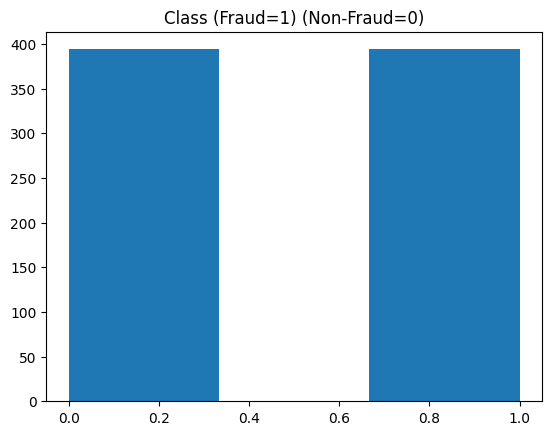

In [ ]:
plt.hist(df_under['Class'], bins=3)
plt.title("Class (Fraud=1) (Non-Fraud=0)")
plt.show()

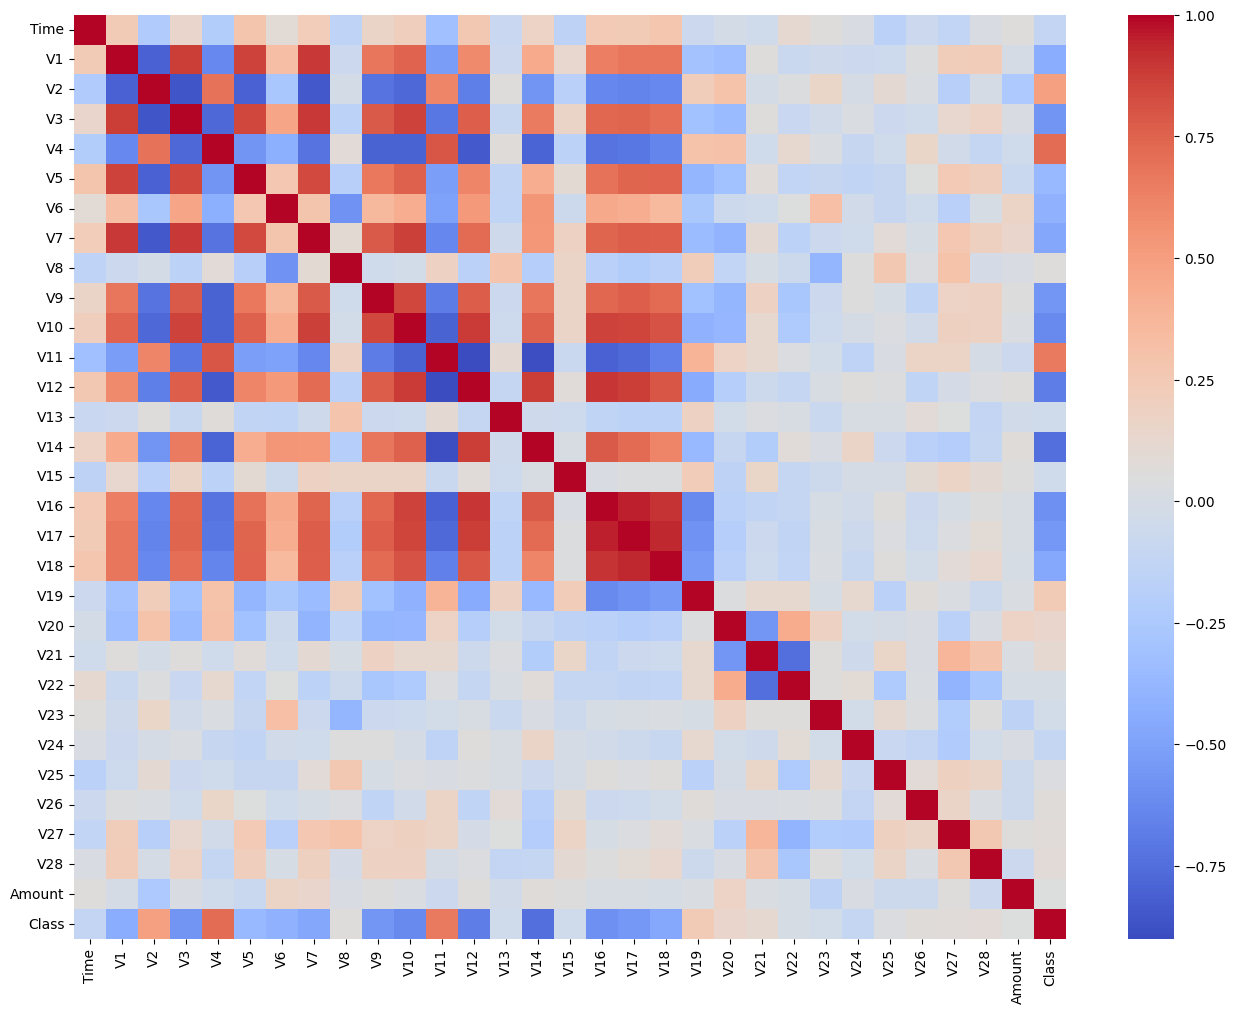

In [ ]:
correlation=df_under.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation,cmap='coolwarm',annot=False)
plt.show()

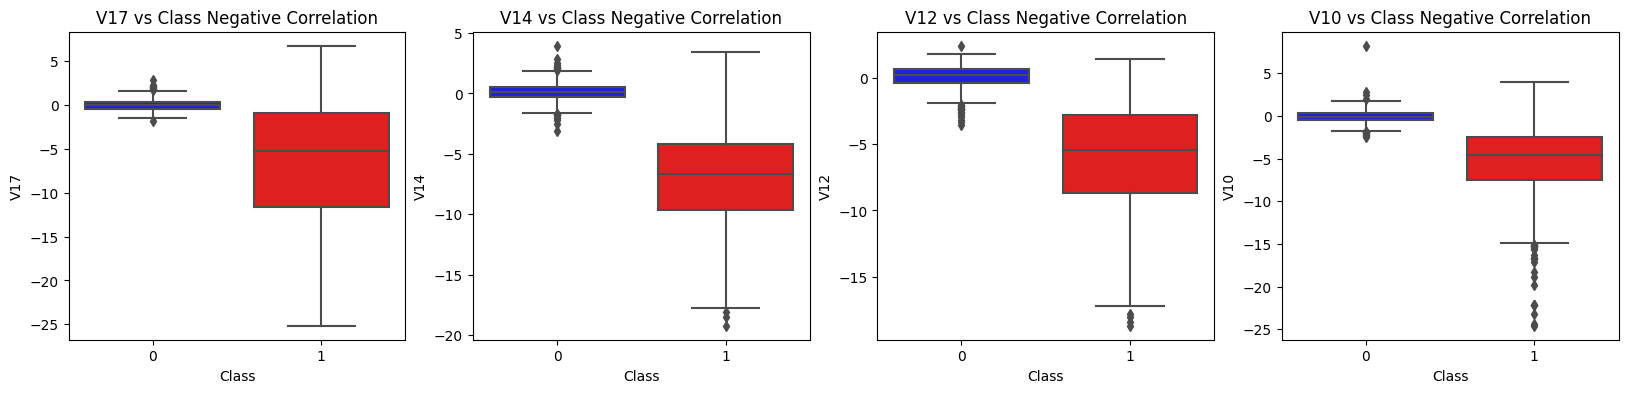

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df_under, palette=['b', 'r'], ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=df_under, palette=['b', 'r'], ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=df_under, palette=['b', 'r'], ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=df_under, palette=['b', 'r'], ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

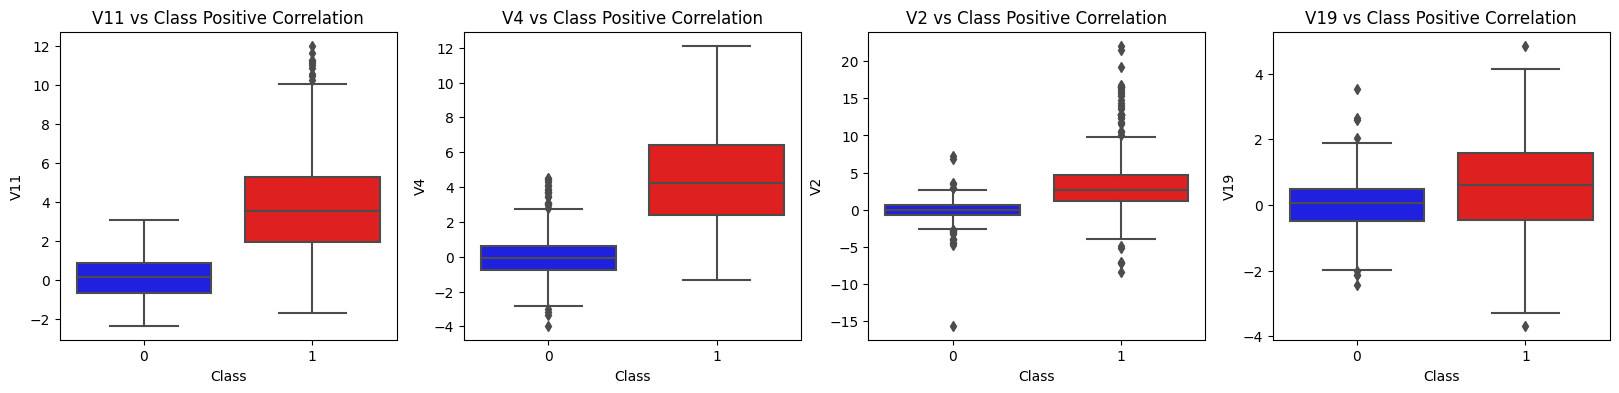

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df_under, palette=['b', 'r'], ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=df_under, palette=['b', 'r'], ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=df_under, palette=['b', 'r'], ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=df_under, palette=['b', 'r'], ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

In [ ]:
print(X_under_train.shape)
print(y_under_train.shape)

(788, 31)
(788,)


In [ ]:
X_under_train = X_under_train.drop(['Class'], axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

# Define the hyperparameters to tune for each model
params = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
    },
    'SVM': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }
}

# Fit each model using GridSearchCV to find the best hyperparameters
best_models = {}
for name, model in models.items():
    clf = GridSearchCV(model, params[name], cv=5, n_jobs=-1)
    clf.fit(X_under_train, y_under_train)
    best_models[name] = clf.best_estimator_
    print(f"Best hyperparameters for {name}: {clf.best_params_}")

# Evaluate the best models on the testing set
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    results[name] = {
        'Accuracy': accuracy,
        'F1 score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds': thresholds
    }

Best hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best hyperparameters for KNN: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
Best hyperparameters for SVM: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}




*   After the models are trained (may take few minutes), various metrics for each model are tested and stored in dataframe to compare.
*   The ROC-AUC curve is also plotted for each model and then we find the confusion matrix for the testing as well as training dataset.
*   Seeing all these parameters and metrics, best model for Random Under Sampling is selected.





In [ ]:
# Create a DataFrame to store the results
df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall', 'ROC AUC'])

# Add the results for each model to the DataFrame
for name, metrics in results.items():
  accuracy = metrics['Accuracy']
  f1 = metrics['F1 score']
  precision = metrics['Precision']
  recall = metrics['Recall']
  roc_auc = metrics['ROC AUC']
  df_results = df_results.append({
    'Model': name,
    'Accuracy': accuracy,
    'F1 score': f1,
    'Precision': precision,
    'Recall': recall,
    'ROC AUC': roc_auc
  }, ignore_index=True)

In [ ]:
df_results

,Model,Accuracy,F1 score,Precision,Recall,ROC AUC
0,Logistic Regression,0.969945,0.095137,0.050167,0.918367,0.977827
1,Decision Tree,0.942909,0.051342,0.026426,0.897959,0.933778
2,Random Forest,0.964854,0.080808,0.042308,0.897959,0.971734
3,KNN,0.963537,0.078936,0.041261,0.908163,0.952608
4,SVM,0.964222,0.081154,0.042453,0.918367,0.977976


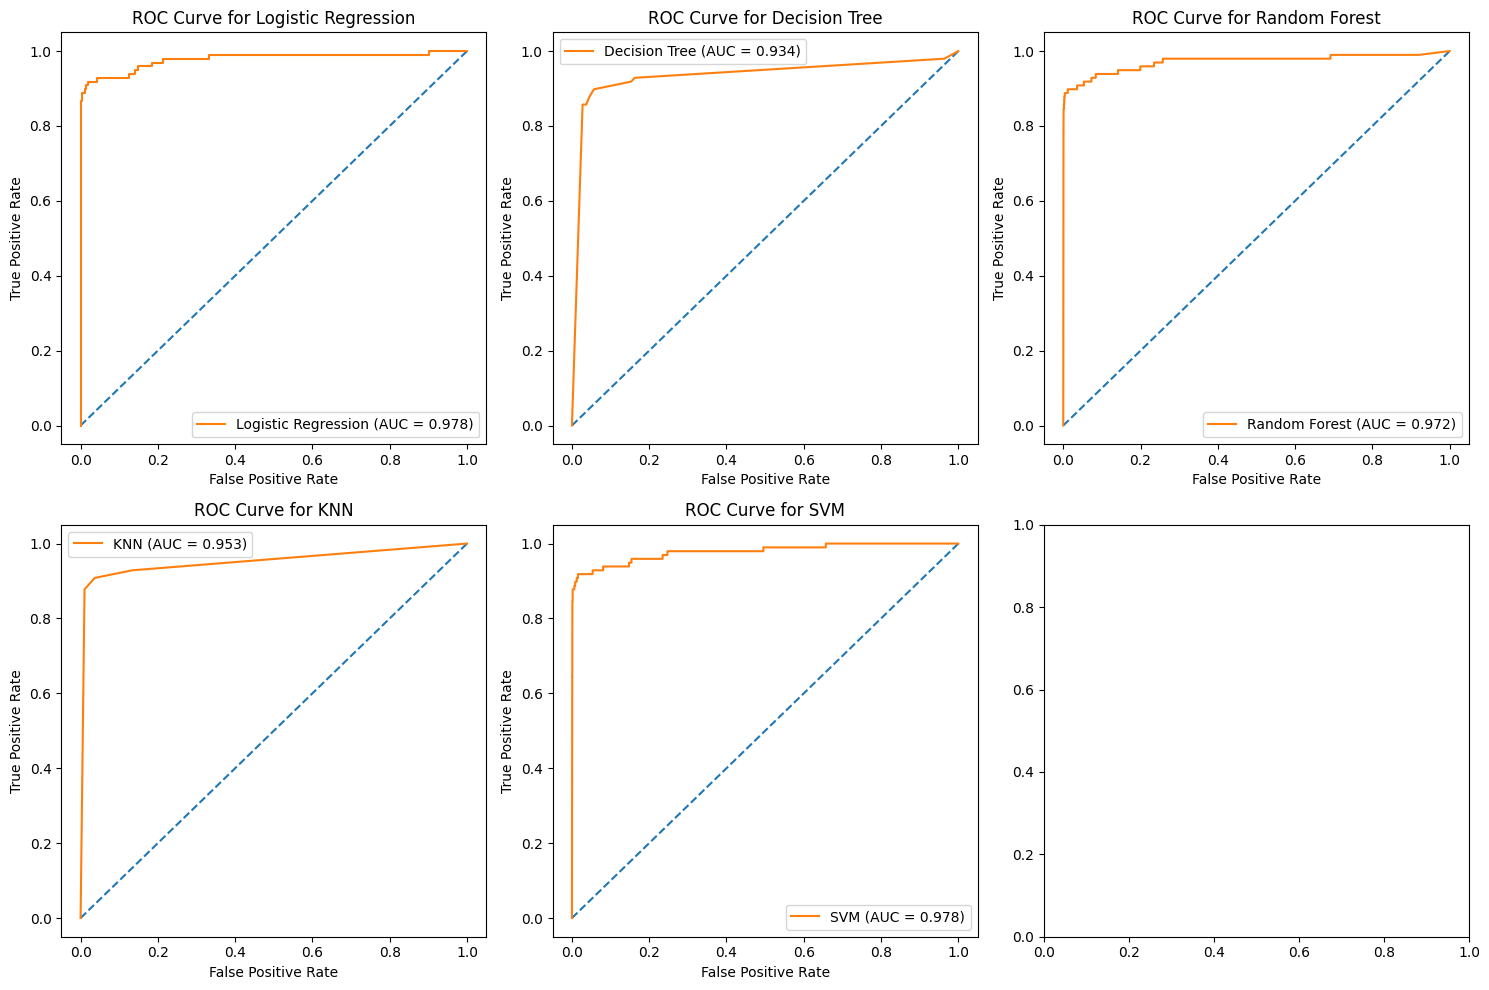

In [ ]:
# Create a grid of subplots for ROC curves
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Plot ROC curves for each model on a separate subplot
for ax, (name, metrics) in zip(axes.flat, results.items()):
  fpr = metrics['FPR']
  tpr = metrics['TPR']
  roc_auc = metrics['ROC AUC']
  ax.plot([0, 1], [0, 1], linestyle='--')
  ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC Curve for {name}')
  ax.legend()
# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = ['Non-Fraud', 'Fraud']

# Define the models and their names
models = [best_models['Logistic Regression'],
          best_models['Decision Tree'],
          best_models['Random Forest'],
          best_models['KNN'],
          best_models['SVM']]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']

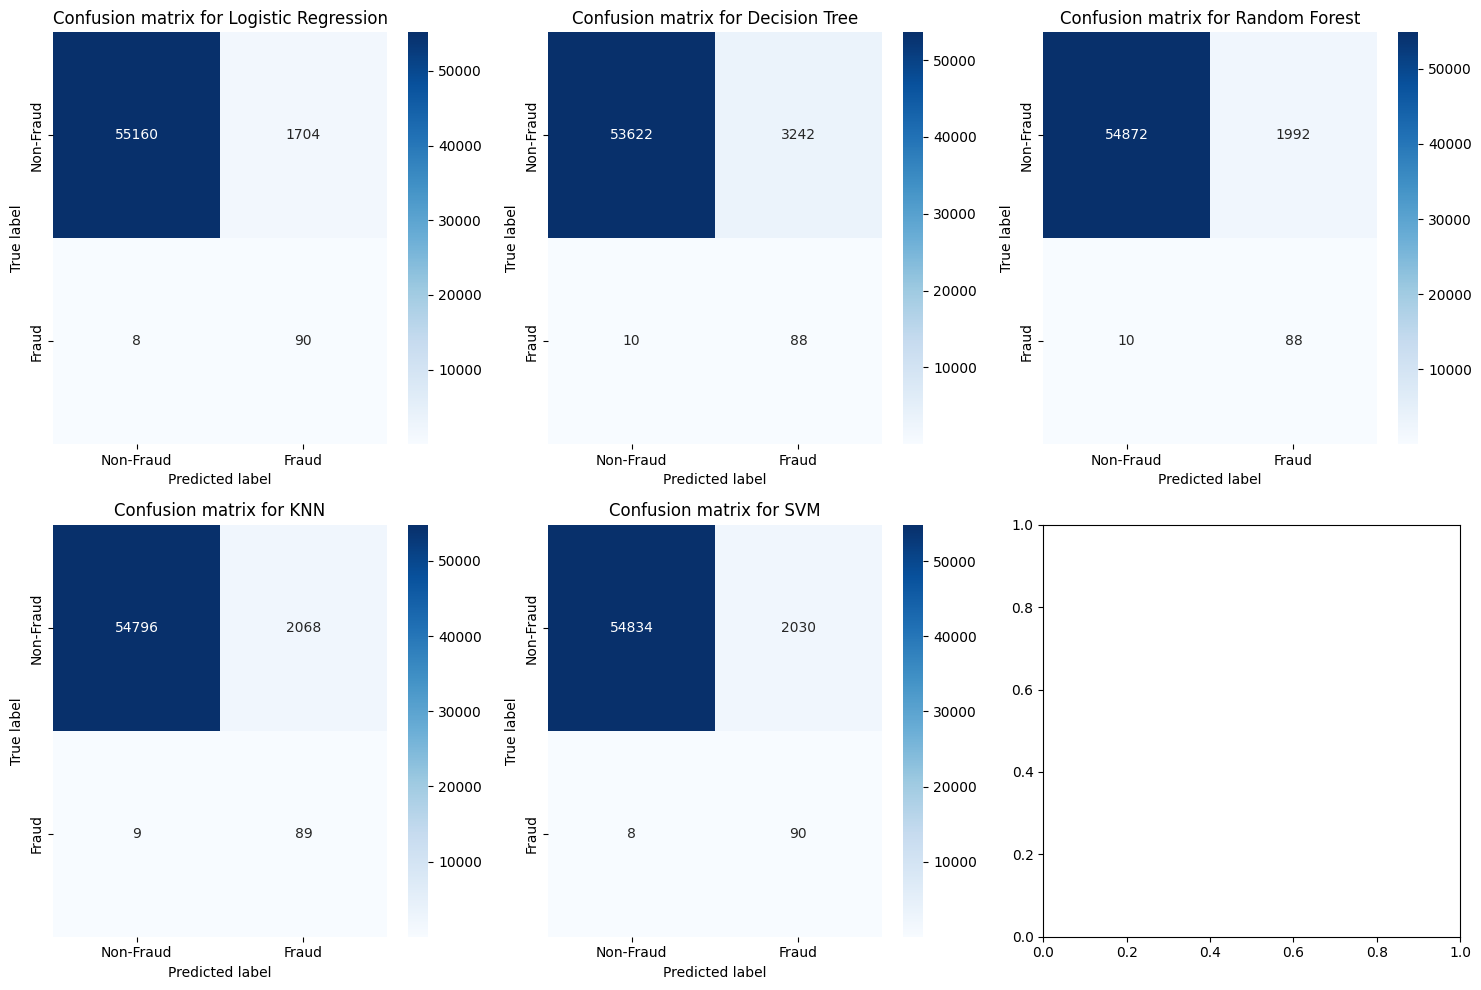

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through each model and its corresponding name and plot the confusion matrix
for i, (name, model) in enumerate(zip(model_names, models)):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[i//3][i%3]
    sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, ax=ax, xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f"Confusion matrix for {name}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


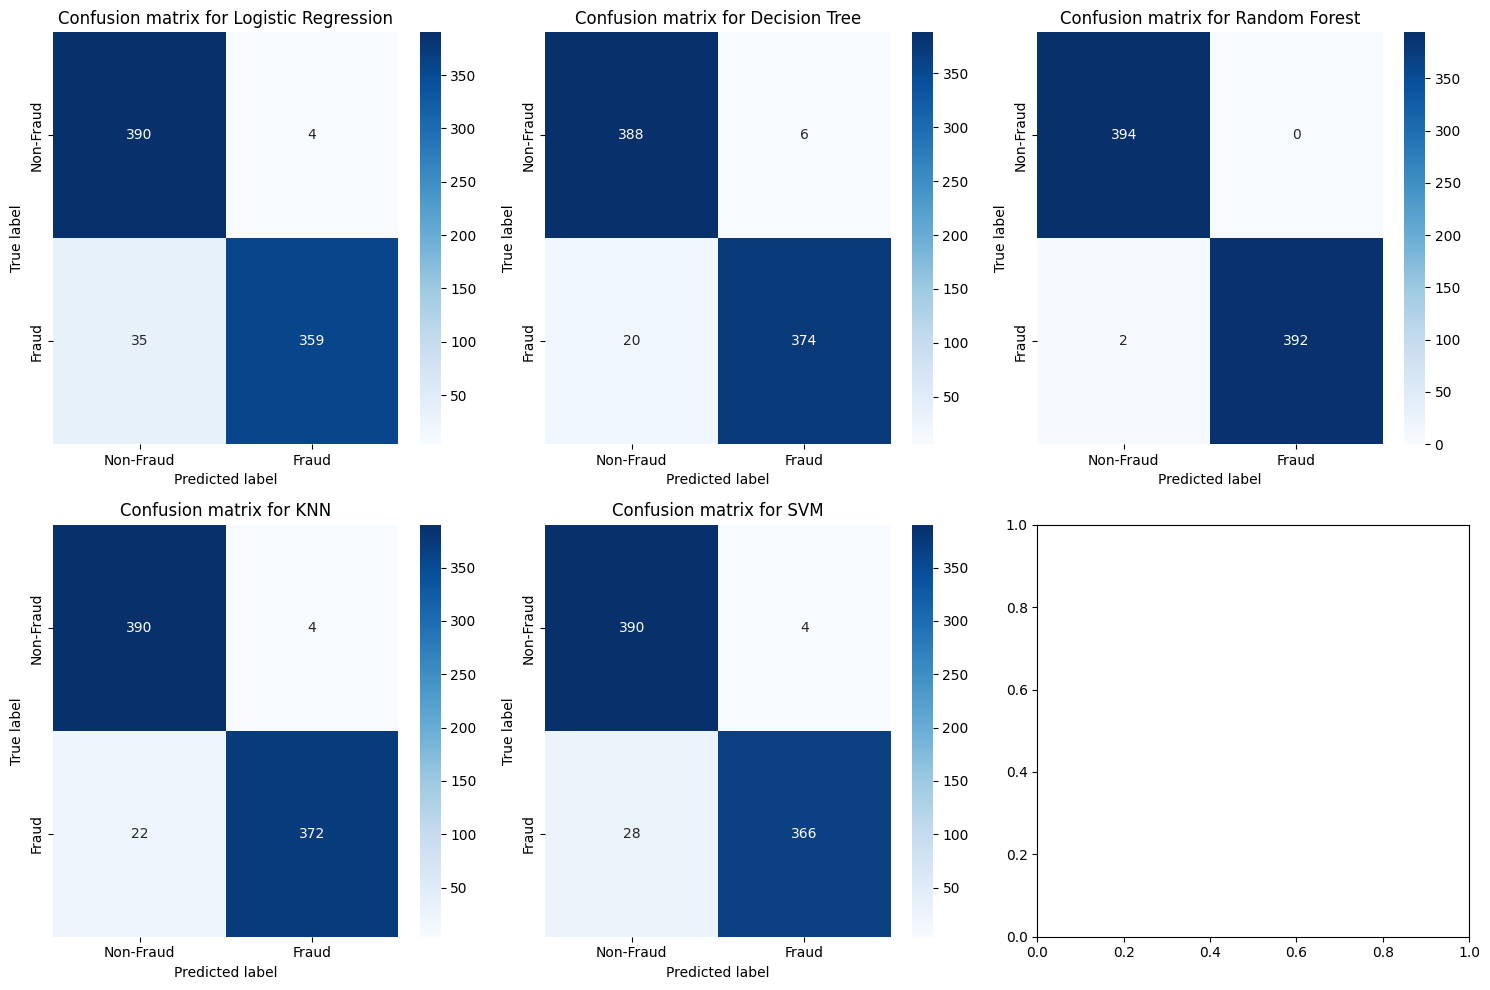

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through each model and its corresponding name and plot the confusion matrix
for i, (name, model) in enumerate(zip(model_names, models)):
    y_pred = model.predict(X_under_train)
    cm = confusion_matrix(y_under_train, y_pred)
    ax = axes[i//3][i%3]
    sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, ax=ax, xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f"Confusion matrix for {name}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


Results of Random Under Sampling : 


*   Random Forest gives best confusion matrix but the F1 score is not good as the precision is low for it.
*   Best model for Random Under Sampling is Random Forest.



# **Applying Random OverSampling**

Documentation :

*   First we applied Random Over Sampling, which balances the dataset. It will randomly choose datasamples of minority class with replacement to make it equal to majority class.
*   Hence the total datasamples in training dataset is 2*(number of samples in majority class).
*   Random Over Sampling is applied to training dataset and the models are trained.
*   Then the models are tested on original test dataset.
*   Also, the positive and negative correlation features are visualised after Random Over Sampling is applied to training dataset.

In [ ]:
# Perform random oversampling
ros = RandomOverSampler(random_state=42)
X_over_train, y_over_train = ros.fit_resample(X_train, y_train)

In [ ]:
# Create new DataFrame of resampled data
df_over = pd.concat([pd.DataFrame(X_over_train), pd.DataFrame(y_over_train)], axis=1)
df_over.columns = df.columns

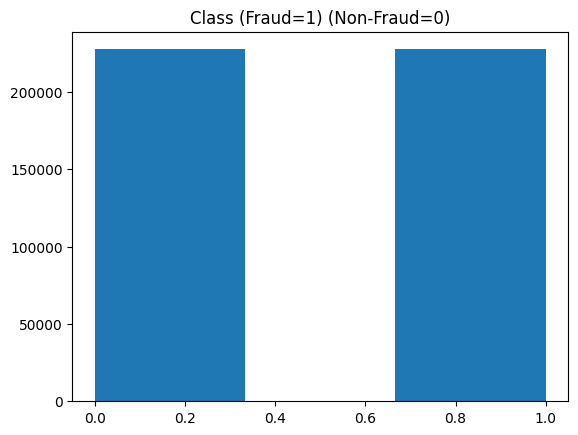

In [ ]:
plt.hist(y_over_train, bins=3)
plt.title("Class (Fraud=1) (Non-Fraud=0)")
plt.show()

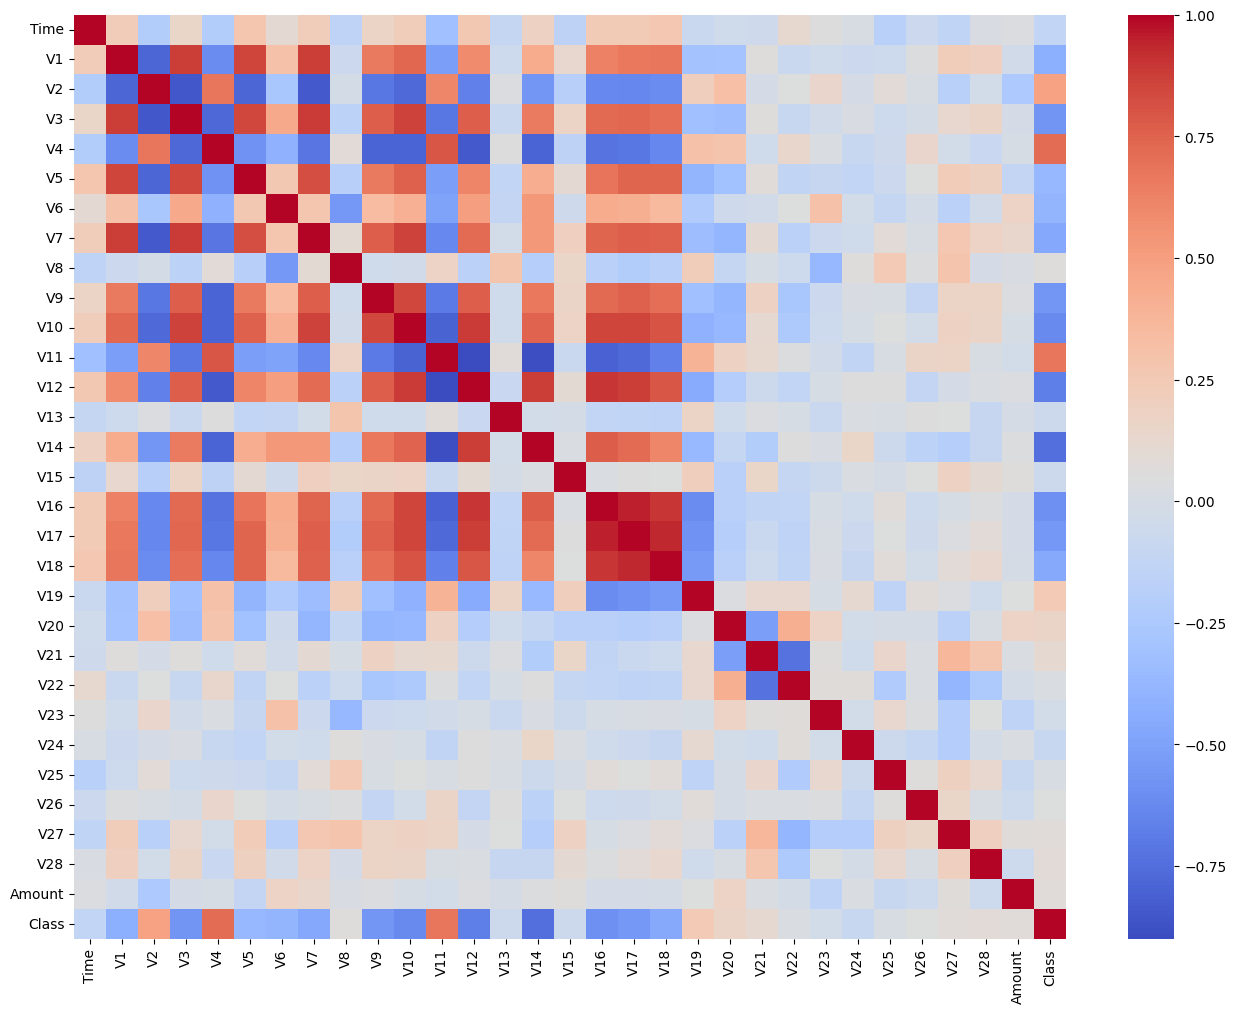

In [ ]:
correlation=df_over.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation,cmap='coolwarm',annot=False)
plt.show()

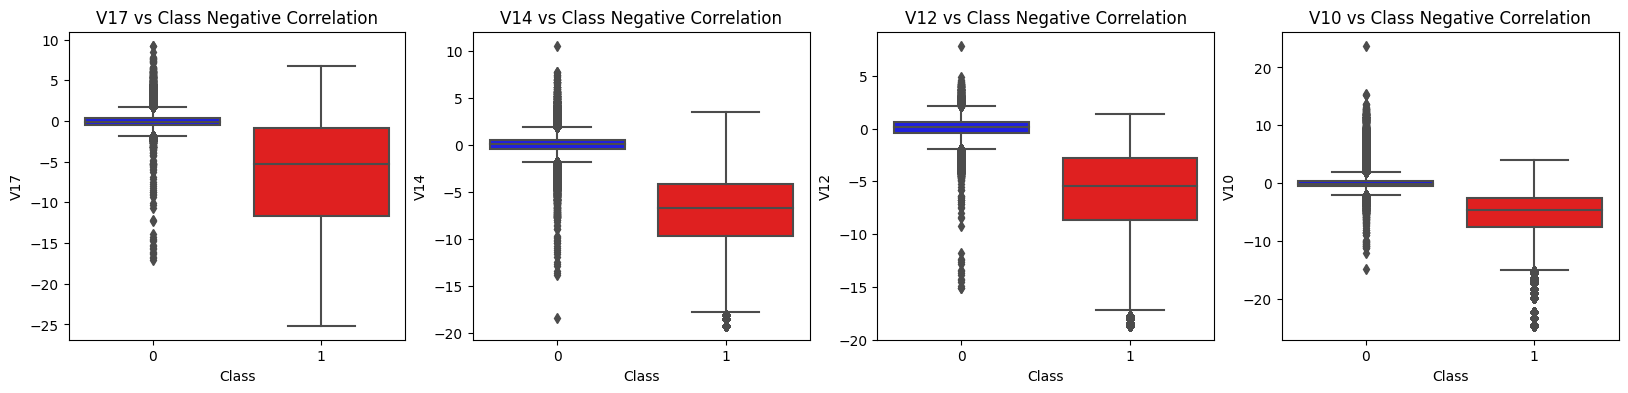

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df_over, palette=['b', 'r'], ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=df_over, palette=['b', 'r'], ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=df_over, palette=['b', 'r'], ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=df_over, palette=['b', 'r'], ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

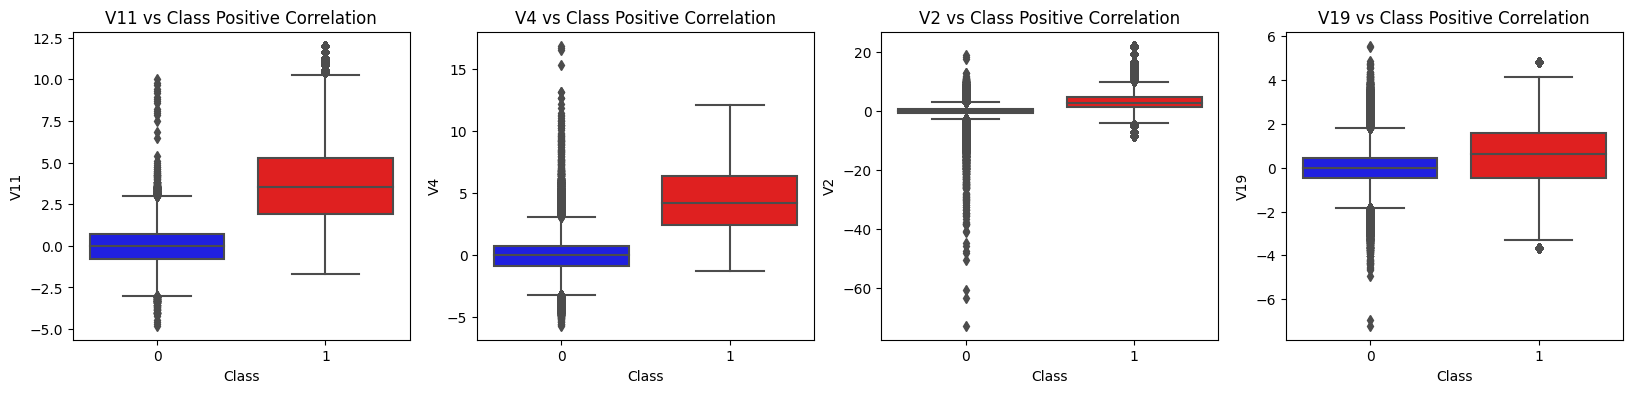

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df_over, palette=['b', 'r'], ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=df_over, palette=['b', 'r'], ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=df_over, palette=['b', 'r'], ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=df_over, palette=['b', 'r'], ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

In [ ]:
print(X_over_train.shape)
print(y_over_train.shape)

(454902, 30)
(454902,)


In [ ]:
# Define the models
models_over = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    # 'SVM': SVC(probability=True)
}

best_models_over = {}
for name, model in models_over.items():
    clf = model
    clf.fit(X_over_train, y_over_train)
    best_models_over[name] = clf
    print(f"Model for {name} built.")

# Evaluate the best models on the testing set
results_over = {}
for name, model in best_models_over.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    results_over[name] = {
        'Accuracy': accuracy,
        'F1 score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds': thresholds
    }

Model for Logistic Regression built.
Model for Decision Tree built.
Model for Random Forest built.
Model for KNN built.


*   After the models are trained (may take few minutes or hours), various metrics for each model are tested and stored in dataframe to compare.
*   The ROC-AUC curve is also plotted for each model and then we find the confusion matrix for the testing as well as training dataset.
*   Seeing all these parameters and metrics, best model for Random Over Sampling is selected.

In [ ]:
# Create a DataFrame to store the results
df_results_over = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall', 'ROC AUC'])

# Add the results for each model to the DataFrame
for name, metrics in results_over.items():
  accuracy = metrics['Accuracy']
  f1 = metrics['F1 score']
  precision = metrics['Precision']
  recall = metrics['Recall']
  roc_auc = metrics['ROC AUC']
  df_results_over = df_results_over.append({
    'Model': name,
    'Accuracy': accuracy,
    'F1 score': f1,
    'Precision': precision,
    'Recall': recall,
    'ROC AUC': roc_auc
  }, ignore_index=True)

In [ ]:
df_results_over

,Model,Accuracy,F1 score,Precision,Recall,ROC AUC
0,Logistic Regression,0.975615,0.114723,0.061183,0.918367,0.972009
1,Decision Tree,0.998999,0.710660,0.707071,0.714286,0.856888
2,Random Forest,0.999561,0.860335,0.950617,0.785714,0.962845
3,KNN,0.999052,0.756757,0.677419,0.857143,0.943672


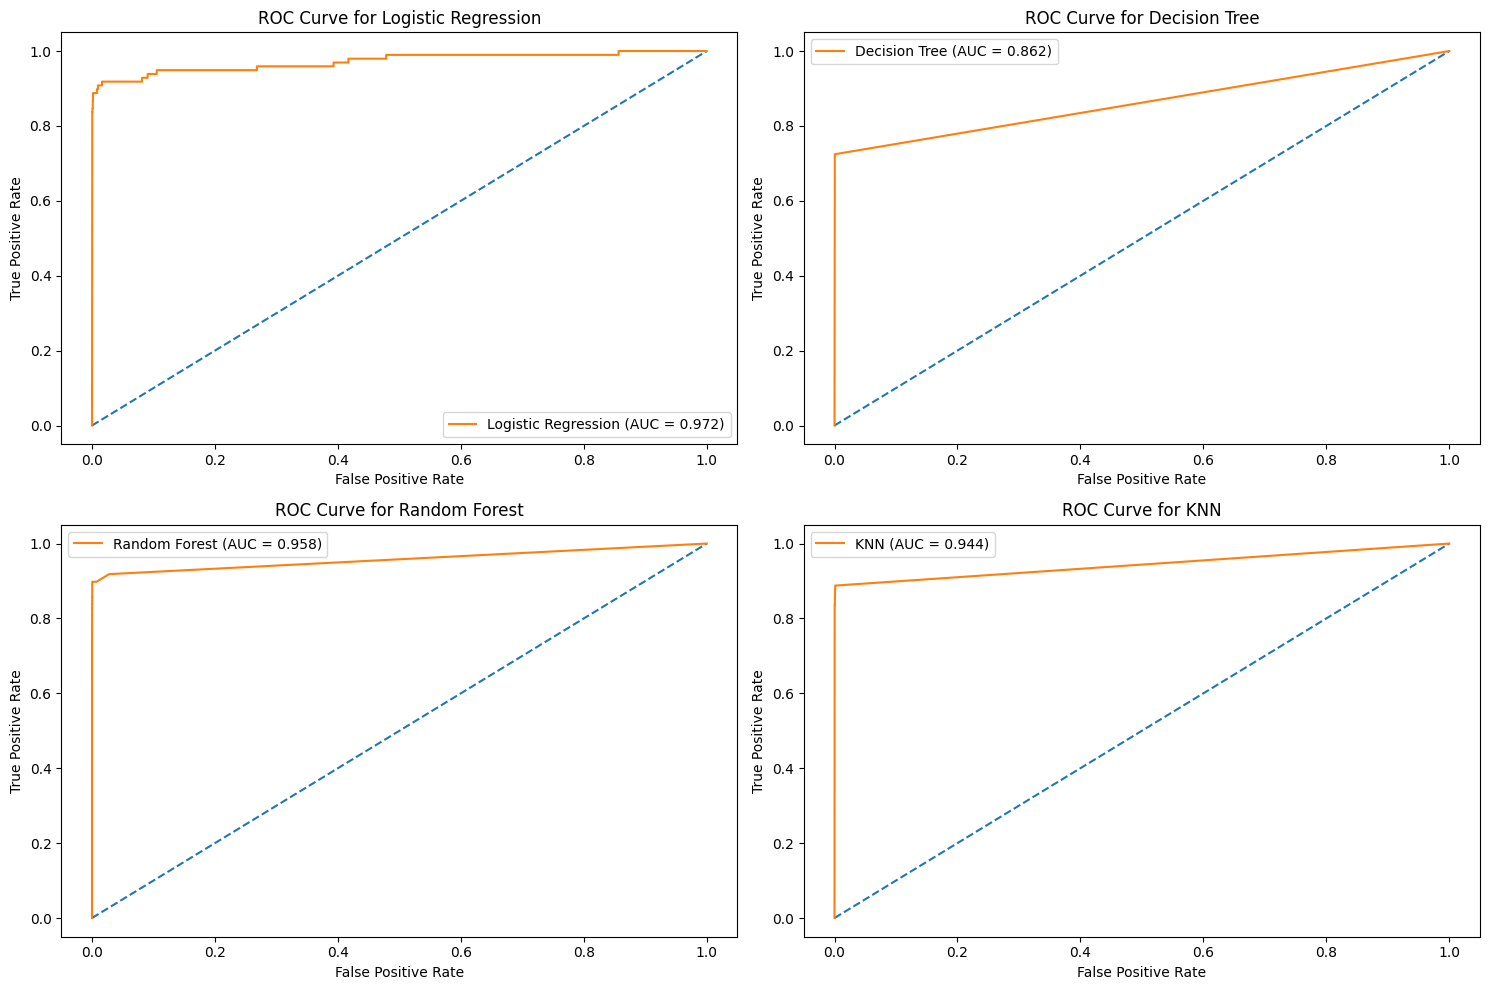

In [ ]:
# Create a grid of subplots for ROC curves
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Plot ROC curves for each model on a separate subplot
for ax, (name, metrics) in zip(axes.flat, results_over.items()):
  fpr = metrics['FPR']
  tpr = metrics['TPR']
  roc_auc = metrics['ROC AUC']
  ax.plot([0, 1], [0, 1], linestyle='--')
  ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC Curve for {name}')
  ax.legend()
# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = ['Non-Fraud', 'Fraud']

# Define the models and their names
models_over_ = [best_models_over['Logistic Regression'],
          best_models_over['Decision Tree'],
          best_models_over['Random Forest'],
          best_models_over['KNN']]
model_names_over = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

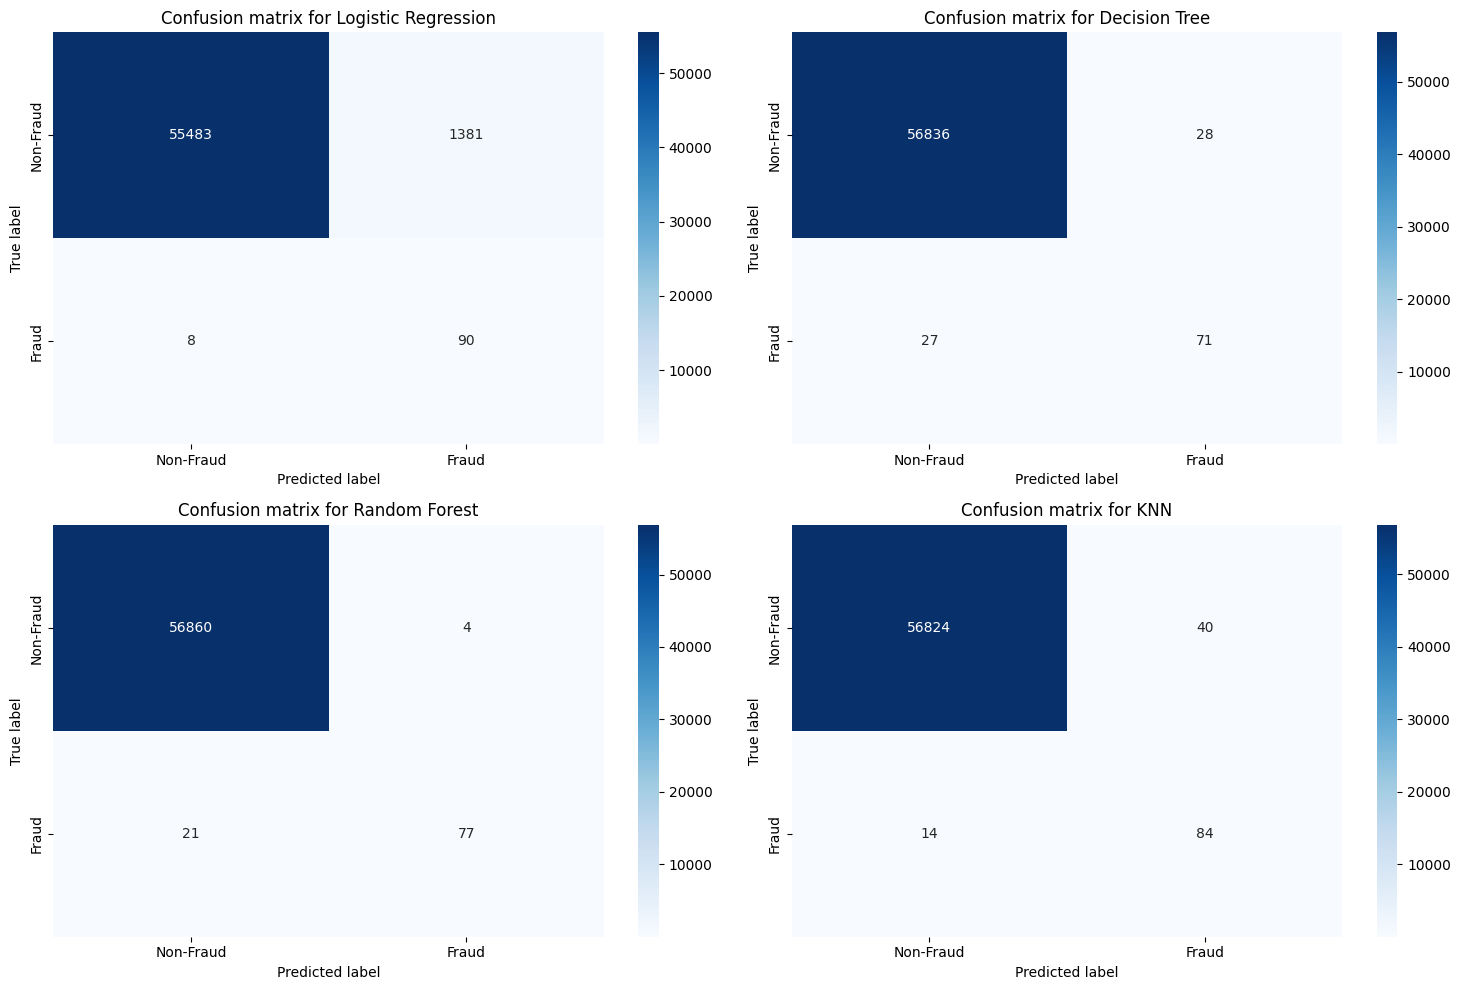

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop through each model and its corresponding name and plot the confusion matrix
for i, (name, model) in enumerate(zip(model_names_over, models_over_)):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[i//2][i%2]
    sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, ax=ax, xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f"Confusion matrix for {name}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


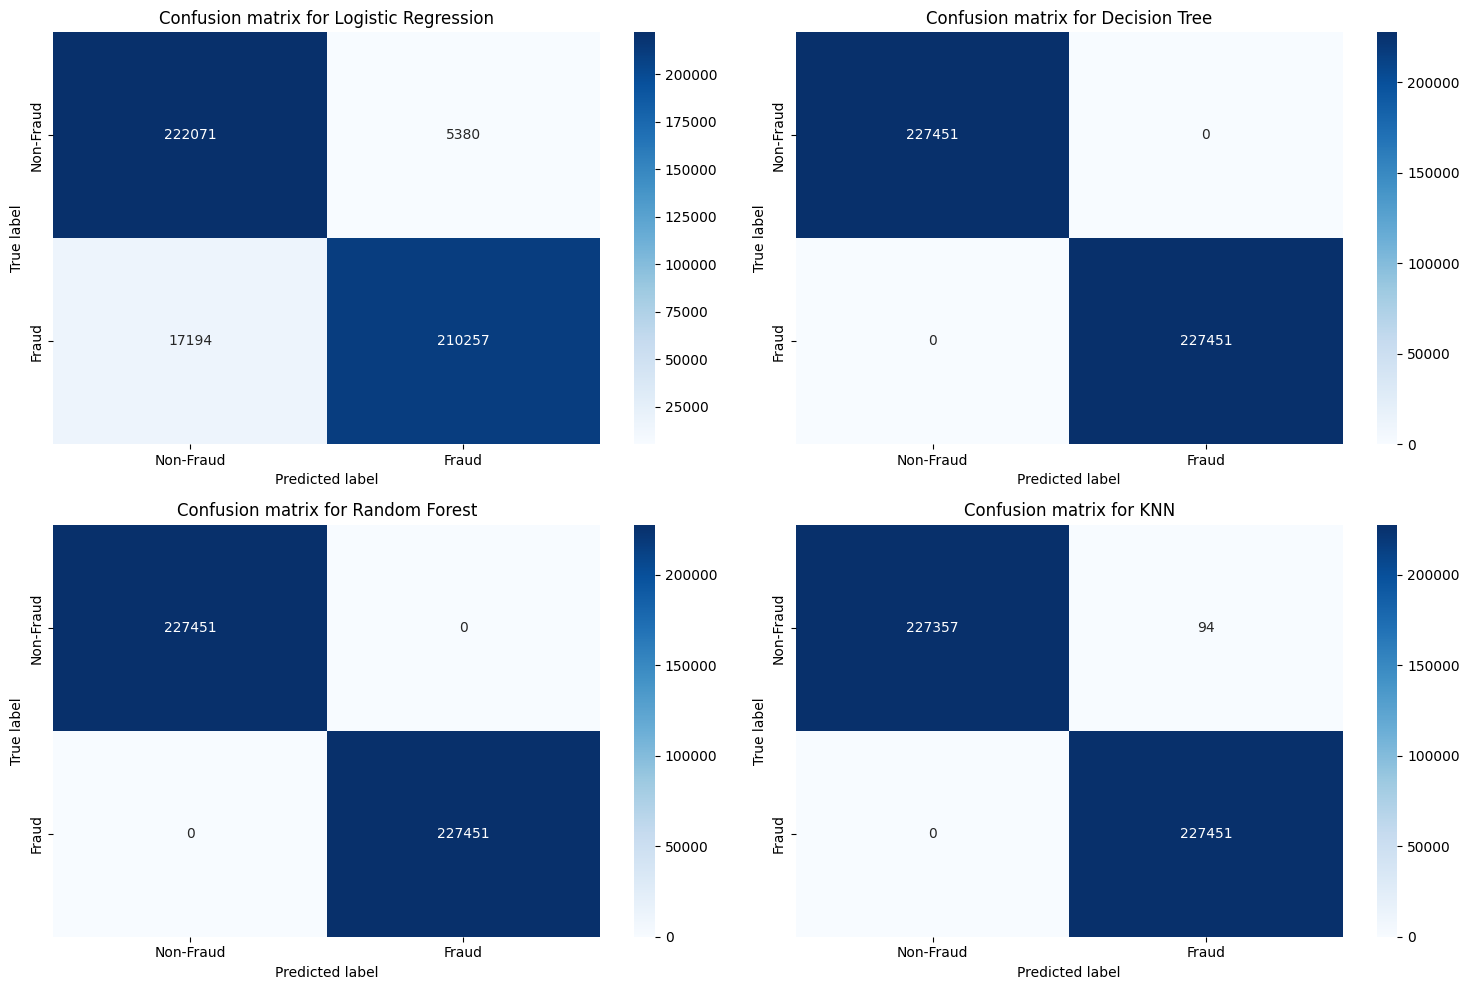

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop through each model and its corresponding name and plot the confusion matrix
for i, (name, model) in enumerate(zip(model_names_over, models_over_)):
    y_pred = model.predict(X_over_train)
    cm = confusion_matrix(y_over_train, y_pred)
    ax = axes[i//2][i%2]
    sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, ax=ax, xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f"Confusion matrix for {name}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


Results of Random Over Sampling :

*   Random Forest gives best confusion matrix and the F1 score is also pretty good as the precision and Recall are good for it.
*   Best model for Random Over Sampling is Random Forest.


# **Applying SMOTE OverSampling**

SMOTE (Synthetic Minority Over-sampling Technique) is another technique for oversampling the minority class. It creates new synthetic instances of the minority class by creating new instances along the line segments that join the minority class instances in the feature space. 

The algorithm works as follows:

*   For each minority class instance, find its k nearest minority class neighbors (k_neighbors).
*   Choose one of the k_neighbors randomly and compute the difference between the feature vector of the chosen neighbor and the current minority class instance (diff = chosen_neighbor - current_instance).
*   Multiply this difference by a random number between 0 and 1 (a random ratio) and add the result to the current instance to generate a new synthetic instance.

By repeating these steps for each minority class instance, we can generate as many synthetic minority class instances as required. 

This technique helps to balance the class distribution without overfitting. 

The synthetic instances generated by SMOTE are not just duplicates of the minority class instances, but rather new examples that reflect the underlying distribution of the minority class. 

This helps to improve the generalization of the model.

Documentation :

*   First we applied SMOTE Over Sampling, which balances the dataset.
*   SMOTE Over Sampling is applied to training dataset and the models are trained.
*   Then the models are tested on original test dataset.
*   Also, the positive and negative correlation features are visualised after SMOTE Over Sampling is applied to training dataset.

In [ ]:
smote = SMOTE(random_state=42)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Create new DataFrame of resampled data
df_smote = pd.concat([pd.DataFrame(X_smote_train), pd.DataFrame(y_smote_train)], axis=1)
df_smote.columns = df.columns

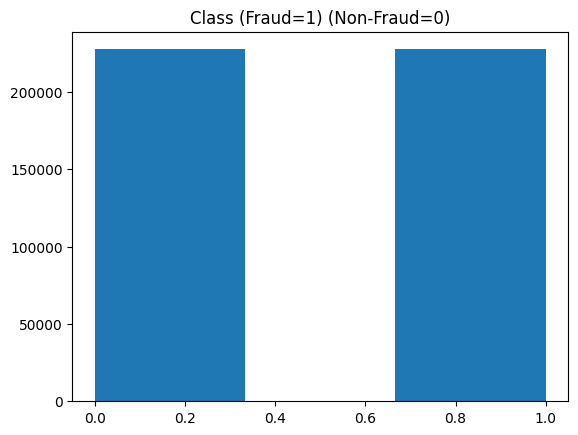

In [ ]:
plt.hist(y_smote_train, bins=3)
plt.title("Class (Fraud=1) (Non-Fraud=0)")
plt.show()

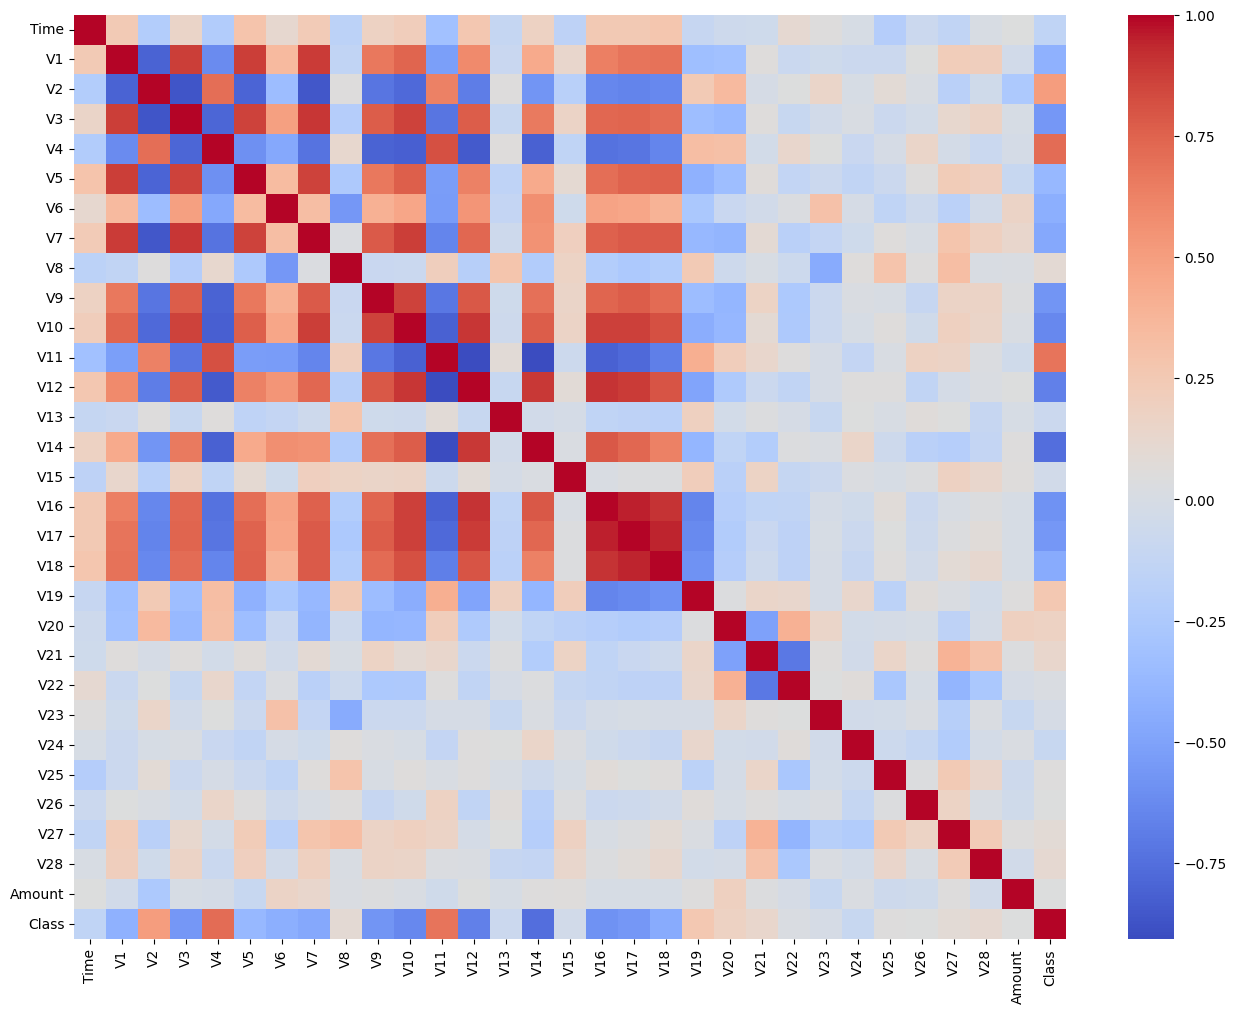

In [ ]:
correlation=df_smote.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation,cmap='coolwarm',annot=False)
plt.show()

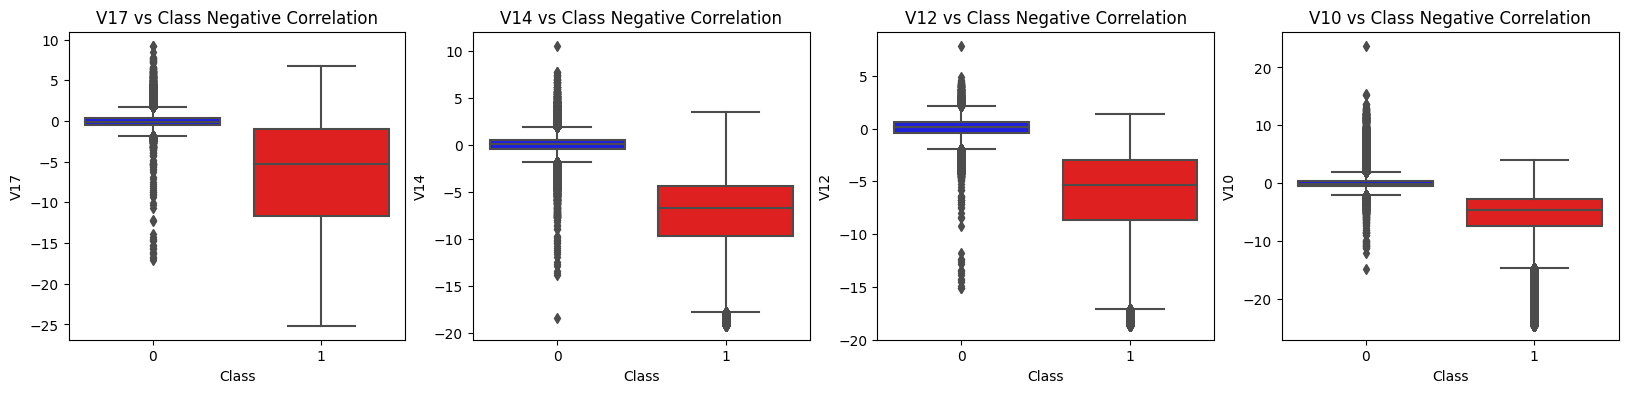

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df_smote, palette=['b', 'r'], ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=df_smote, palette=['b', 'r'], ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=df_smote, palette=['b', 'r'], ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=df_smote, palette=['b', 'r'], ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

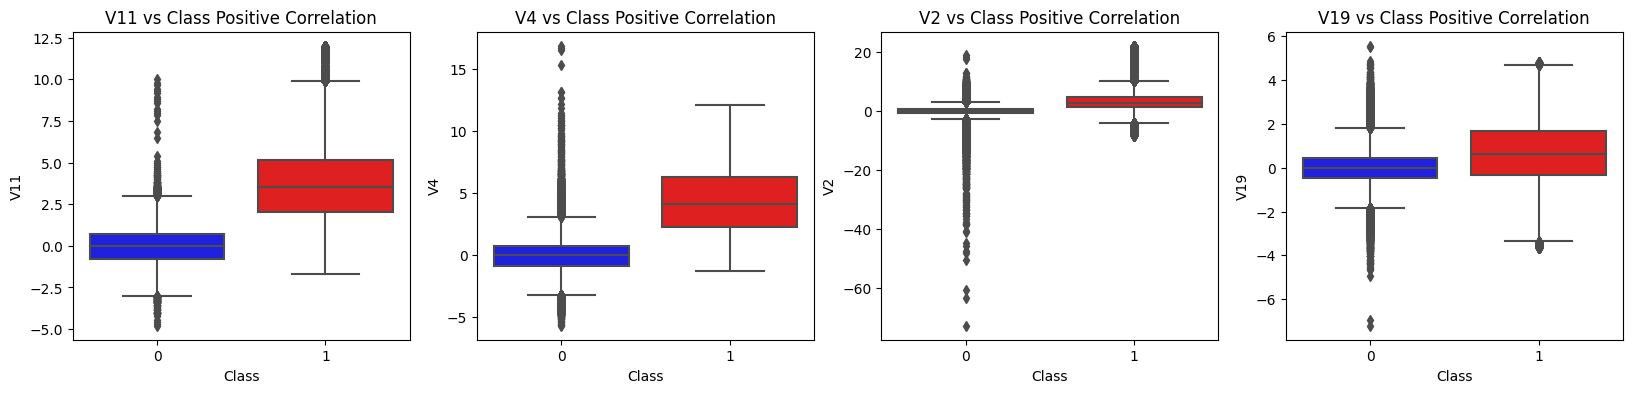

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df_smote, palette=['b', 'r'], ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=df_smote, palette=['b', 'r'], ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=df_smote, palette=['b', 'r'], ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=df_smote, palette=['b', 'r'], ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

In [ ]:
print(X_smote_train.shape)
print(y_smote_train.shape)

(454902, 30)
(454902,)


In [ ]:
# Define the models
models_smote = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    # 'SVM': SVC(probability=True)
}

best_models_smote = {}
for name, model in models_smote.items():
    clf = model
    clf.fit(X_smote_train, y_smote_train)
    best_models_smote[name] = clf
    print(f"Model for {name} built.")

# Evaluate the best models on the testing set
results_smote = {}
for name, model in best_models_smote.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    results_smote[name] = {
        'Accuracy': accuracy,
        'F1 score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds': thresholds
    }

Model for Logistic Regression built.
Model for Decision Tree built.
Model for Random Forest built.
Model for KNN built.


*   After the models are trained (may take few minutes or hours), various metrics for each model are tested and stored in dataframe to compare.
*   The ROC-AUC curve is also plotted for each model and then we find the confusion matrix for the testing as well as training dataset.
*   Seeing all these parameters and metrics, best model for Random Over Sampling is selected.

In [ ]:
# Create a DataFrame to store the results
df_results_smote = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall', 'ROC AUC'])

# Add the results for each model to the DataFrame
for name, metrics in results_smote.items():
  accuracy = metrics['Accuracy']
  f1 = metrics['F1 score']
  precision = metrics['Precision']
  recall = metrics['Recall']
  roc_auc = metrics['ROC AUC']
  df_results_smote = df_results_smote.append({
    'Model': name,
    'Accuracy': accuracy,
    'F1 score': f1,
    'Precision': precision,
    'Recall': recall,
    'ROC AUC': roc_auc
  }, ignore_index=True)

In [ ]:
df_results_smote

,Model,Accuracy,F1 score,Precision,Recall,ROC AUC
0,Logistic Regression,0.974457,0.110092,0.058556,0.918367,0.970103
1,Decision Tree,0.997665,0.539792,0.408377,0.795918,0.896966
2,Random Forest,0.999386,0.816754,0.838710,0.795918,0.958588
3,KNN,0.998086,0.612100,0.469945,0.877551,0.948482


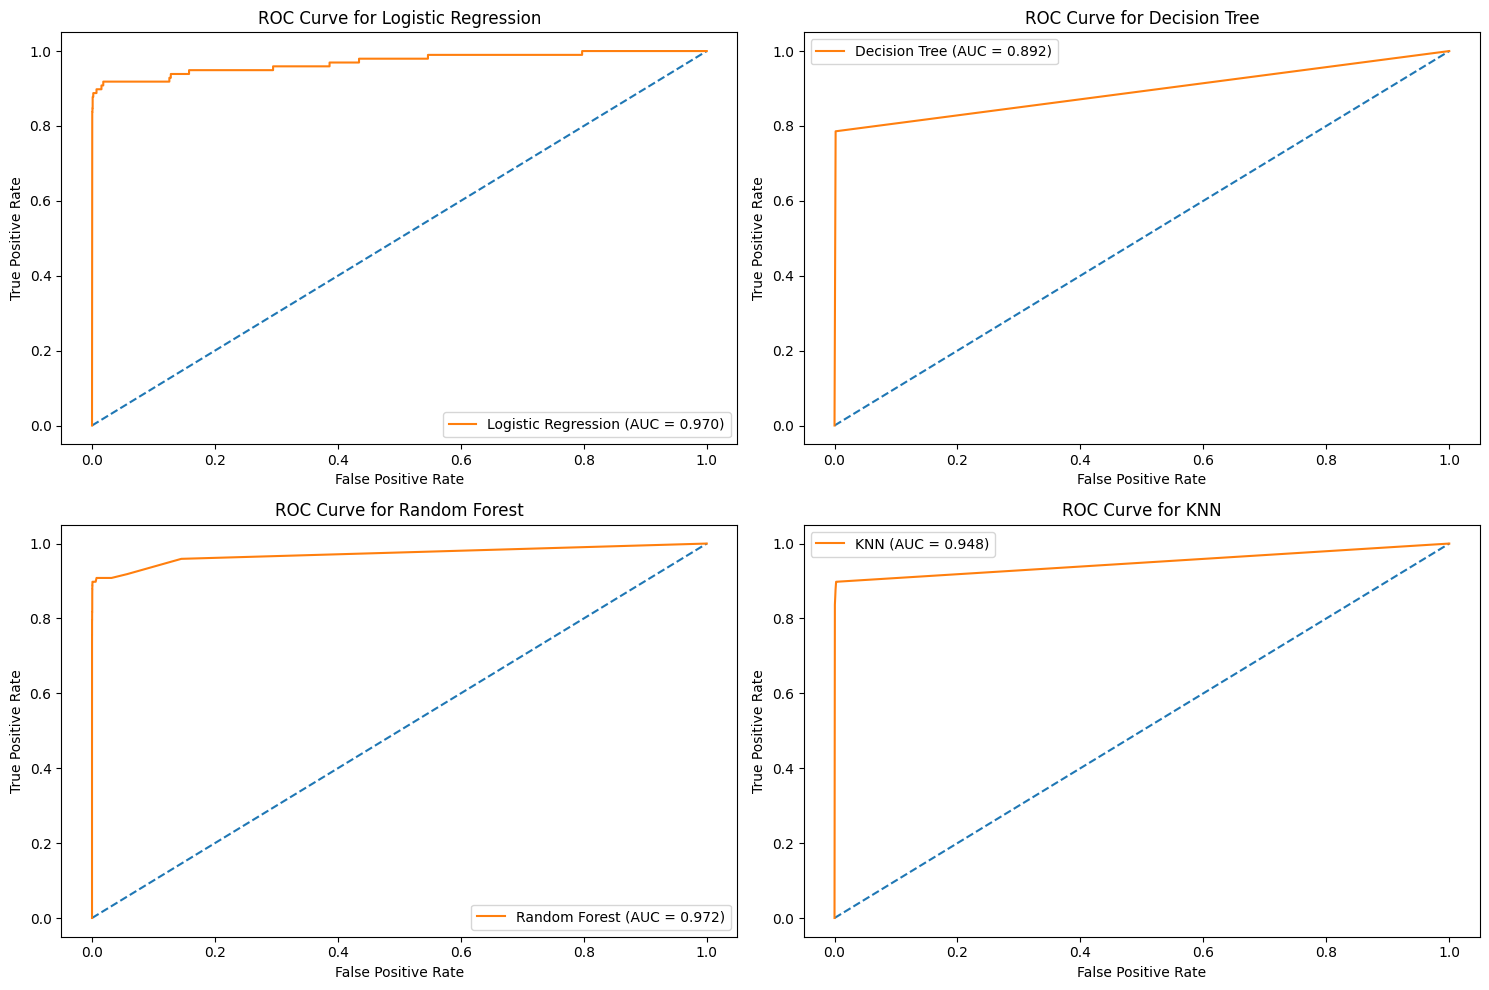

In [ ]:
# Create a grid of subplots for ROC curves
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Plot ROC curves for each model on a separate subplot
for ax, (name, metrics) in zip(axes.flat, results_smote.items()):
  fpr = metrics['FPR']
  tpr = metrics['TPR']
  roc_auc = metrics['ROC AUC']
  ax.plot([0, 1], [0, 1], linestyle='--')
  ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC Curve for {name}')
  ax.legend()
# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = ['Non-Fraud', 'Fraud']

# Define the models and their names
models_smote_ = [best_models_smote['Logistic Regression'],
          best_models_smote['Decision Tree'],
          best_models_smote['Random Forest'],
          best_models_smote['KNN']]
model_names_smote = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

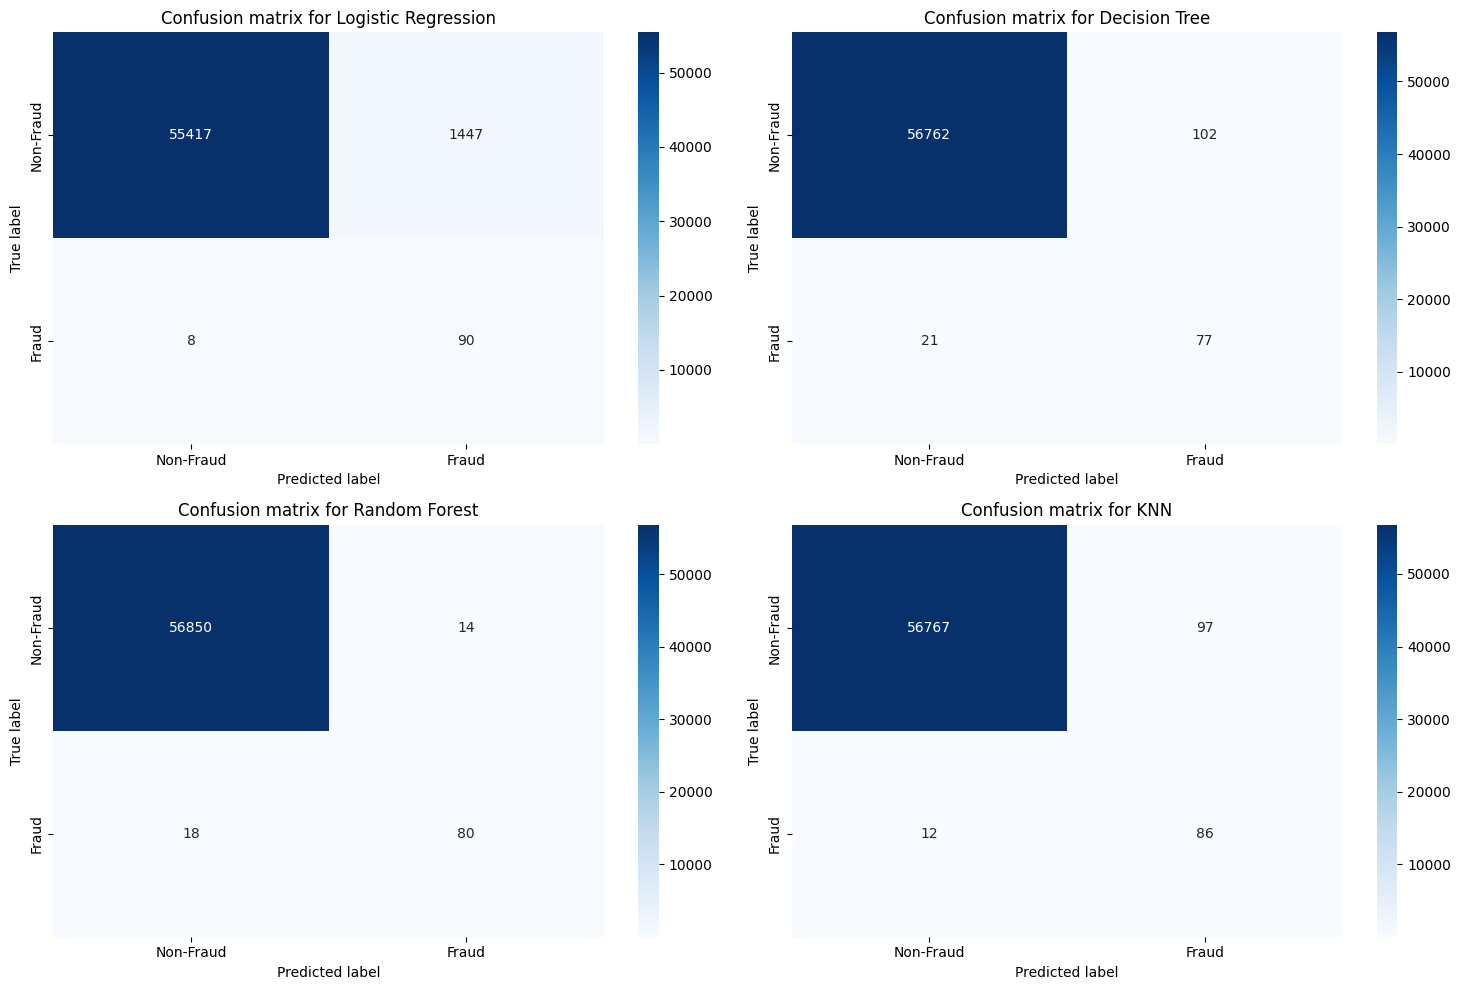

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop through each model and its corresponding name and plot the confusion matrix
for i, (name, model) in enumerate(zip(model_names_smote, models_smote_)):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[i//2][i%2]
    sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, ax=ax, xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f"Confusion matrix for {name}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


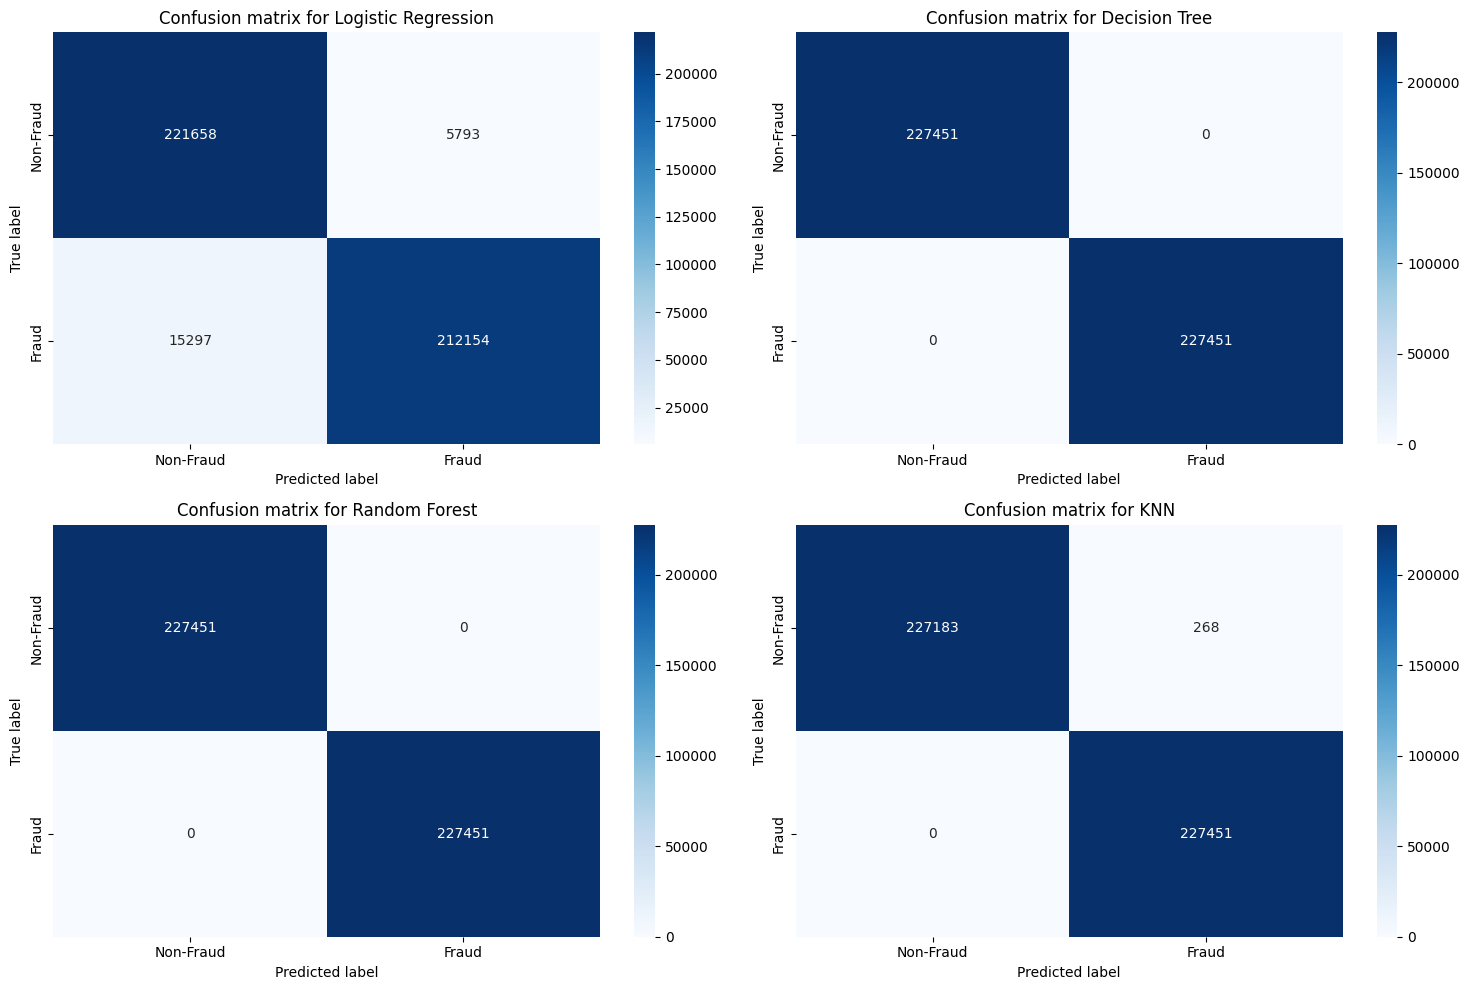

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop through each model and its corresponding name and plot the confusion matrix
for i, (name, model) in enumerate(zip(model_names_smote, models_smote_)):
    y_pred = model.predict(X_smote_train)
    cm = confusion_matrix(y_smote_train, y_pred)
    ax = axes[i//2][i%2]
    sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, ax=ax, xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f"Confusion matrix for {name}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


Results of SMOTE Over Sampling :

*   Random Forest gives best confusion matrix and the F1 score is also pretty good as the precision and Recall are good for it.
*   Best model for SMOTE Over Sampling is Random Forest.
*   SMOTE results are nearly similar to Random Over Sampling.

# **Applying NearMiss UnderSampling**

*   NearMiss is a family of under-sampling techniques which selects the samples from the majority class whose distances to the closest samples in the minority class are the smallest.
*   The main idea behind NearMiss is that samples from the majority class that are located close to the minority class are more likely to be misclassified than those that are far away from the minority class.
*   The selected samples from the majority class are kept in the final dataset, and the minority class is left unchanged.
*   Therefore, NearMiss under-samples the majority class and does not create new synthetic samples like the over-sampling techniques do.

Documentation :

*   First we applied NearMiss Under Sampling, which balances the dataset.
*   NearMiss Under Sampling is applied to training dataset and the models are trained using GridSearch CV, which finds optimal values for hyperparameters for the selected models.
*   Then the models are tested on original test dataset.
*   Also, the positive and negative correlation features are visualised after NearMiss Under Sampling is applied to training dataset.

In [ ]:
# apply NearMiss to the training dataset
nm = NearMiss()
X_near_train, y_near_train = nm.fit_resample(X_train, y_train)

In [ ]:
# Create new DataFrame of resampled data
df_nearMiss = pd.concat([pd.DataFrame(X_near_train), pd.DataFrame(y_near_train)], axis=1)
df_nearMiss.columns = df.columns

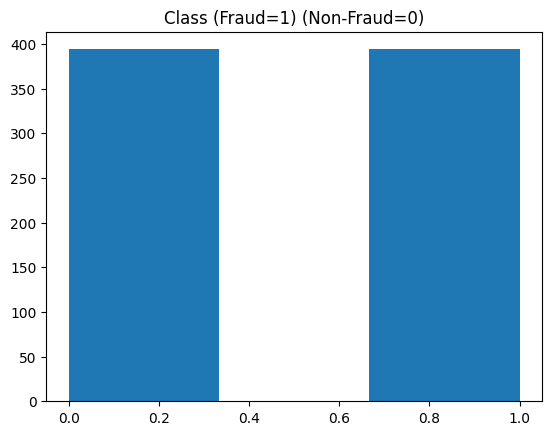

In [ ]:
plt.hist(y_near_train, bins=3)
plt.title("Class (Fraud=1) (Non-Fraud=0)")
plt.show()

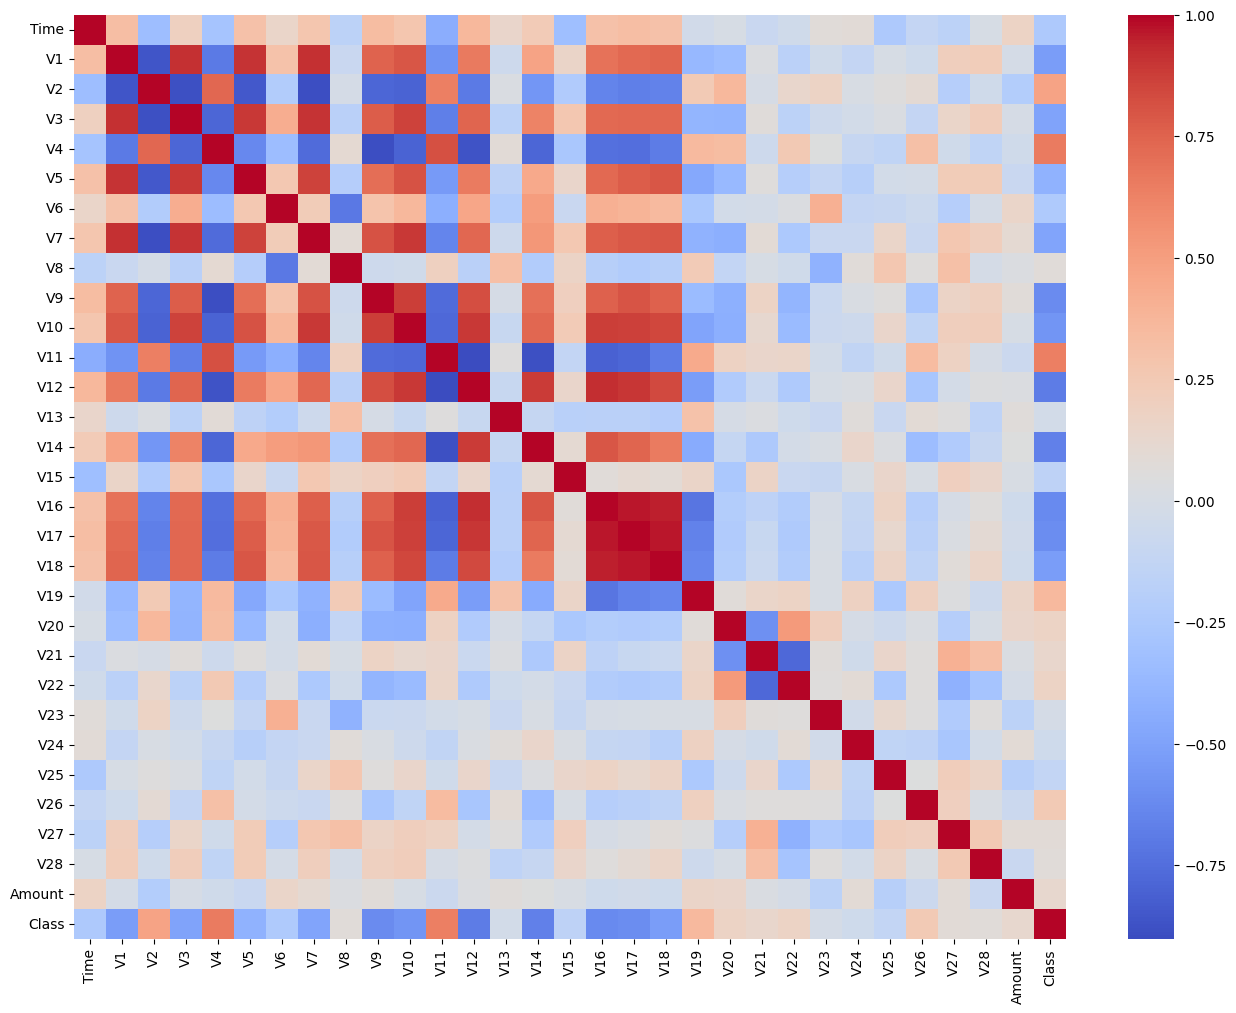

In [ ]:
correlation=df_nearMiss.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation,cmap='coolwarm',annot=False)
plt.show()

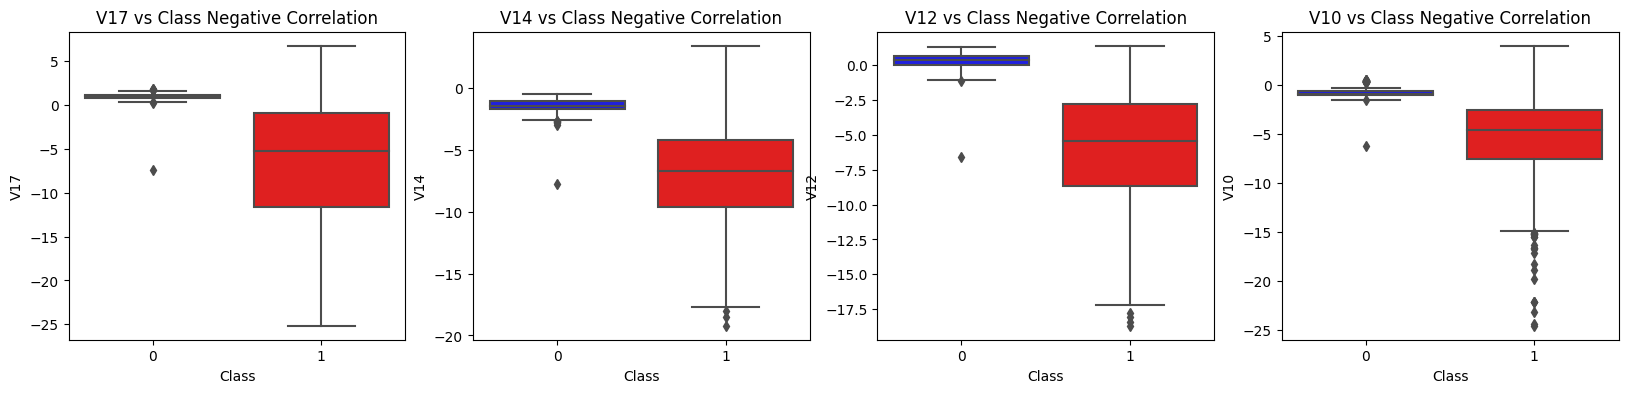

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df_nearMiss, palette=['b', 'r'], ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=df_nearMiss, palette=['b', 'r'], ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=df_nearMiss, palette=['b', 'r'], ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=df_nearMiss, palette=['b', 'r'], ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

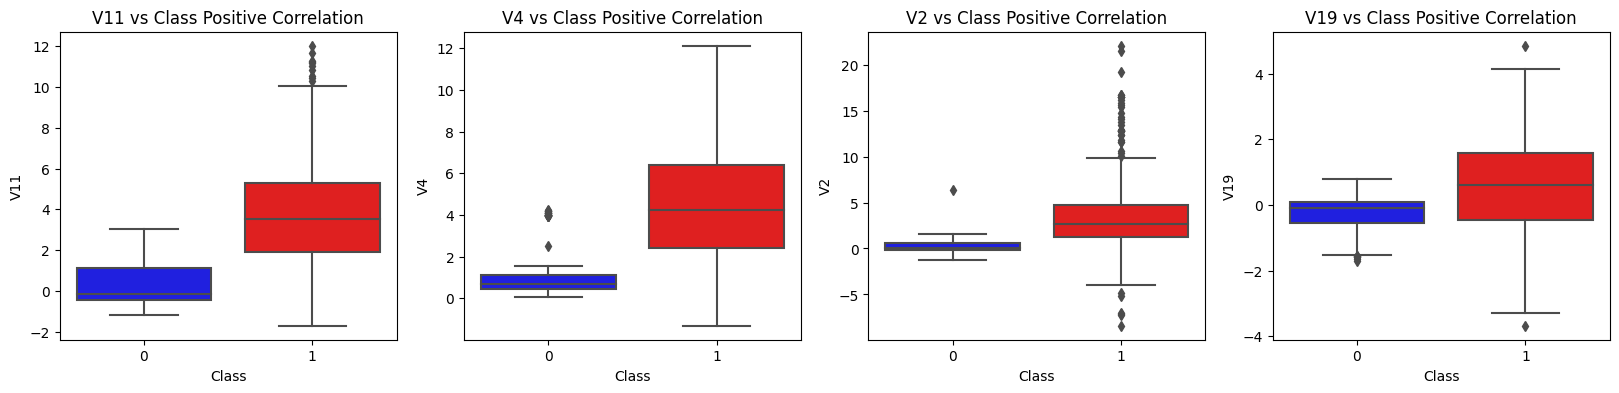

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df_nearMiss, palette=['b', 'r'], ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=df_nearMiss, palette=['b', 'r'], ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=df_nearMiss, palette=['b', 'r'], ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=df_nearMiss, palette=['b', 'r'], ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

In [ ]:
print(X_near_train.shape)
print(y_near_train.shape)

(788, 30)
(788,)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the models
models_nearMiss = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

# Define the hyperparameters to tune for each model
params = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
    },
    'SVM': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }
}

# Fit each model using GridSearchCV to find the best hyperparameters
best_models_nearMiss = {}
for name, model in models_nearMiss.items():
    clf = GridSearchCV(model, params[name], cv=5, n_jobs=-1)
    clf.fit(X_near_train, y_near_train)
    best_models_nearMiss[name] = clf.best_estimator_
    print(f"Best hyperparameters for {name}: {clf.best_params_}")

# Evaluate the best models on the testing set
results_nearMiss = {}
for name, model in best_models_nearMiss.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    results_nearMiss[name] = {
        'Accuracy': accuracy,
        'F1 score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds': thresholds
    }

Best hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best hyperparameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best hyperparameters for KNN: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
Best hyperparameters for SVM: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


*   After the models are trained (may take few minutes or hours), various metrics for each model are tested and stored in dataframe to compare.
*   The ROC-AUC curve is also plotted for each model and then we find the confusion matrix for the testing as well as training dataset.
*   Seeing all these parameters and metrics, best model for Random Over Sampling is selected.

In [ ]:
# Create a DataFrame to store the results
df_results_nearMiss = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 score', 'Precision', 'Recall', 'ROC AUC'])

# Add the results for each model to the DataFrame
for name, metrics in results_nearMiss.items():
  accuracy = metrics['Accuracy']
  f1 = metrics['F1 score']
  precision = metrics['Precision']
  recall = metrics['Recall']
  roc_auc = metrics['ROC AUC']
  df_results_nearMiss = df_results_nearMiss.append({
    'Model': name,
    'Accuracy': accuracy,
    'F1 score': f1,
    'Precision': precision,
    'Recall': recall,
    'ROC AUC': roc_auc
  }, ignore_index=True)

In [ ]:
df_results_nearMiss

,Model,Accuracy,F1 score,Precision,Recall,ROC AUC
0,Logistic Regression,0.666567,0.009595,0.004822,0.938776,0.936615
1,Decision Tree,0.079456,0.003724,0.001865,1.000000,0.549618
2,Random Forest,0.072153,0.003657,0.001832,0.989796,0.928125
3,KNN,0.665040,0.009654,0.004852,0.948980,0.889770
4,SVM,0.185053,0.004162,0.002085,0.989796,0.898782


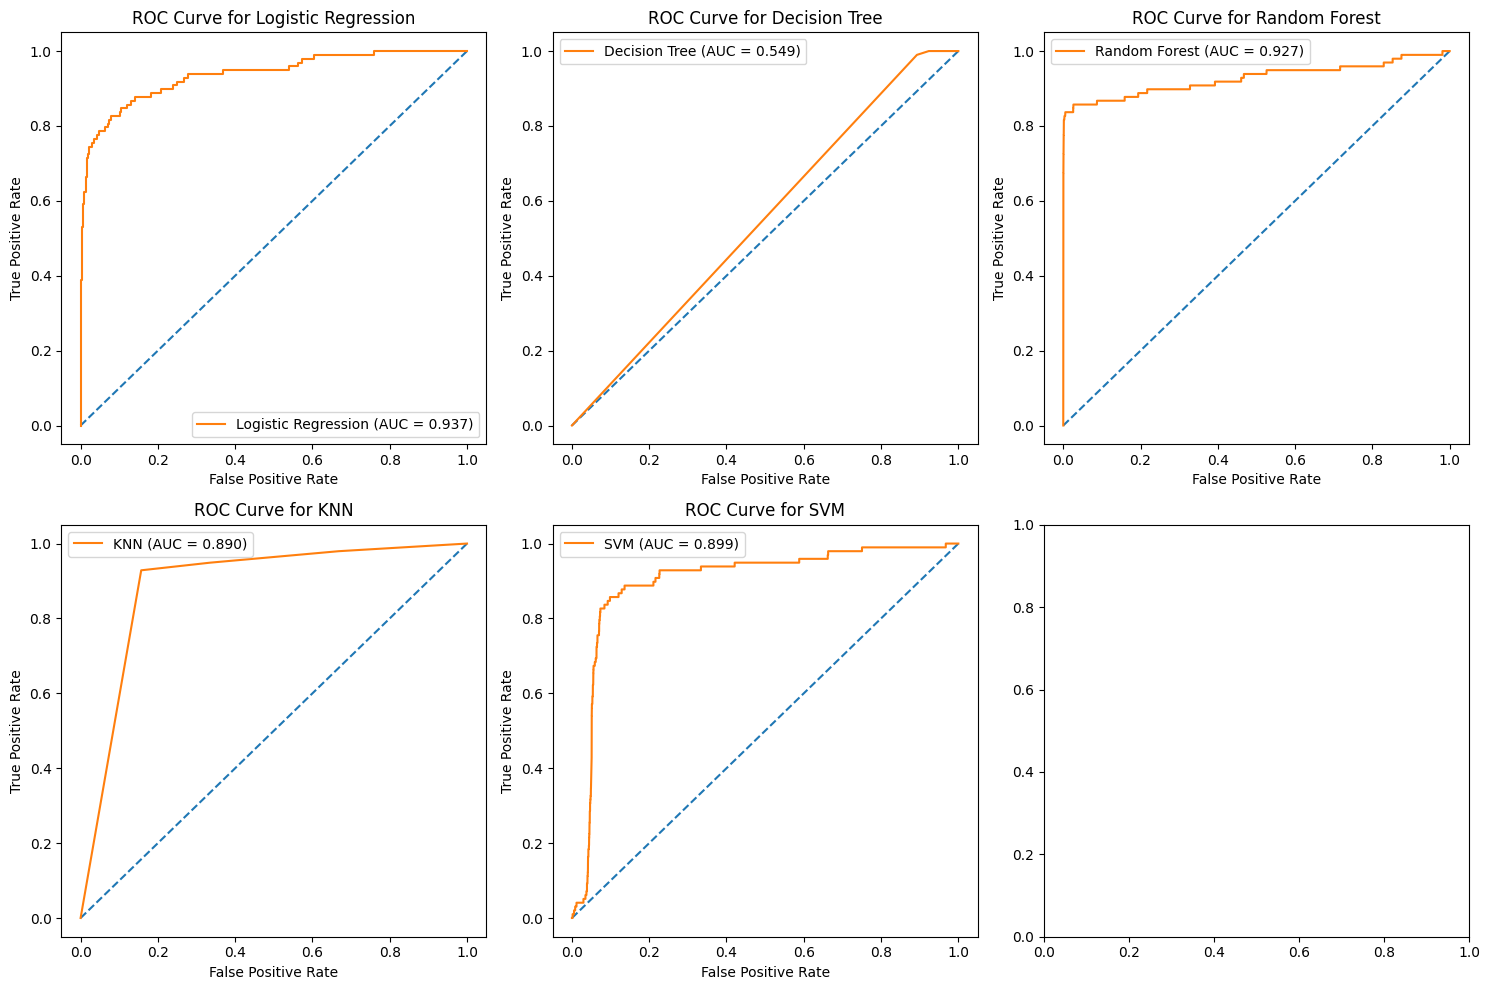

In [ ]:
# Create a grid of subplots for ROC curves
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Plot ROC curves for each model on a separate subplot
for ax, (name, metrics) in zip(axes.flat, results_nearMiss.items()):
  fpr = metrics['FPR']
  tpr = metrics['TPR']
  roc_auc = metrics['ROC AUC']
  ax.plot([0, 1], [0, 1], linestyle='--')
  ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC Curve for {name}')
  ax.legend()
# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = ['Non-Fraud', 'Fraud']

# Define the models and their names
models_nearMiss = [best_models_nearMiss['Logistic Regression'],
          best_models_nearMiss['Decision Tree'],
          best_models_nearMiss['Random Forest'],
          best_models_nearMiss['KNN'],
          best_models_nearMiss['SVM']]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']

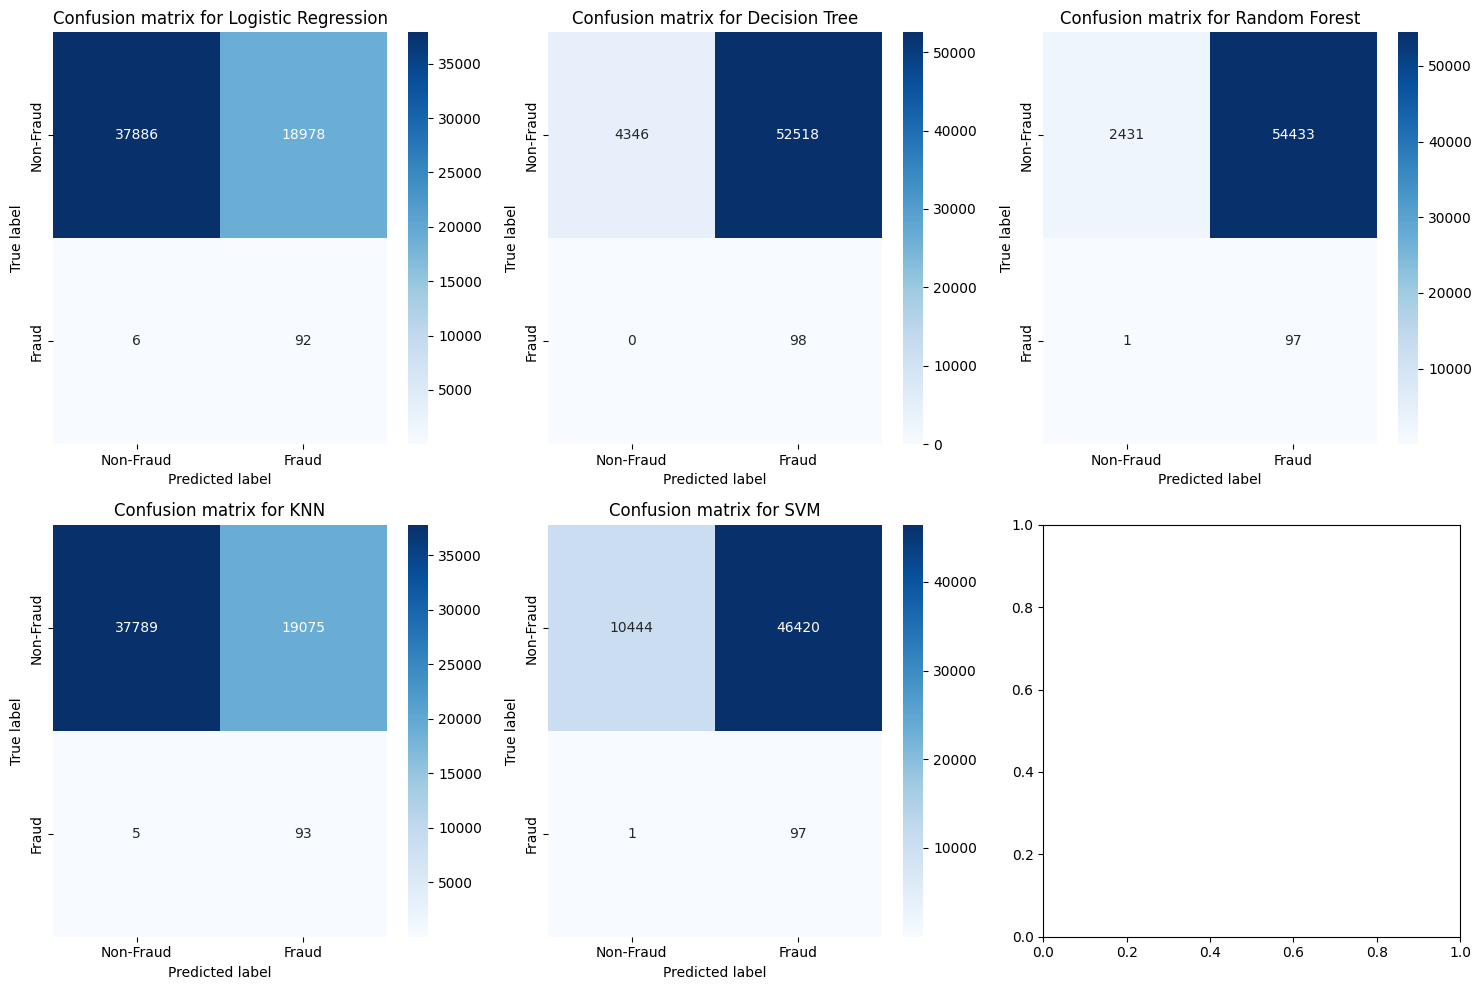

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through each model and its corresponding name and plot the confusion matrix
for i, (name, model) in enumerate(zip(model_names, models_nearMiss)):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[i//3][i%3]
    sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, ax=ax, xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f"Confusion matrix for {name}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


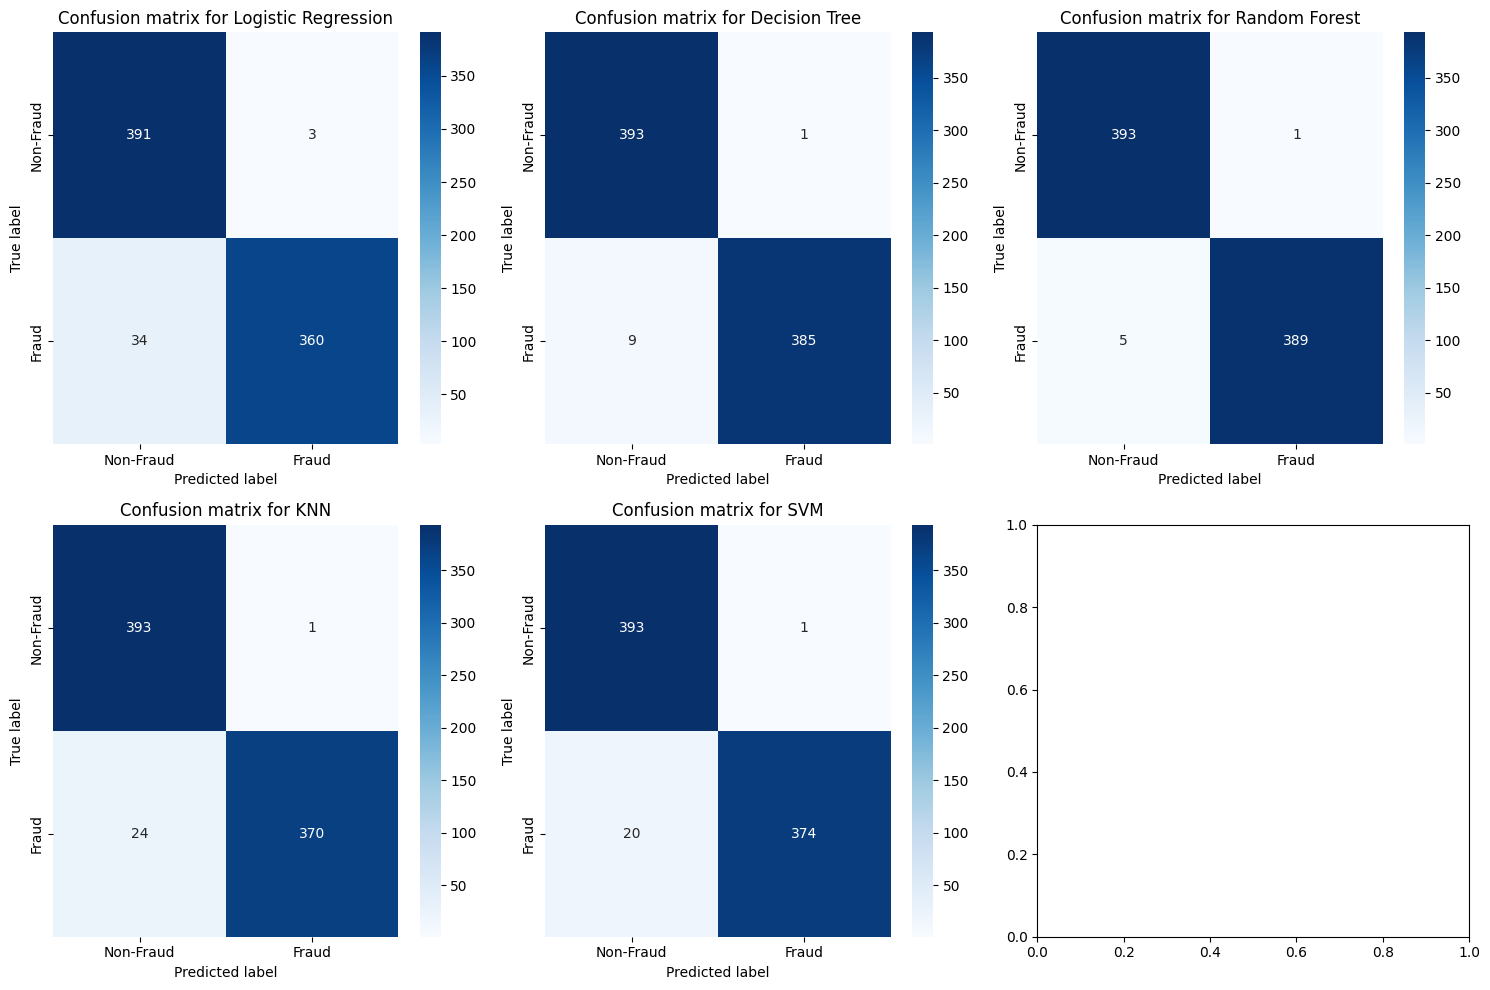

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through each model and its corresponding name and plot the confusion matrix
for i, (name, model) in enumerate(zip(model_names, models_nearMiss)):
    y_pred = model.predict(X_near_train)
    cm = confusion_matrix(y_near_train, y_pred)
    ax = axes[i//3][i%3]
    sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, ax=ax, xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f"Confusion matrix for {name}")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()


Results of NearMiss Under Sampling :

*   Logistic Regression gives best confusion matrix and the F1 score is also pretty good as the precision and Recall are good for it.
*   Best model for NearMiss Under Sampling is Logistic Regression.
*   NearMiss results are not similar to Random Under Sampling, it performs a bit better than Random Under Sampling.

# **Analysing Best Models**



*   Combining all the best models from all the 4 techniques applied for balancing the dataset.
*   Storing their results in a new dataframe.



In [ ]:
best_models = {
    'Random Forest_RandomUnderSampling' : models[2],
    'Random Forest_RandomOverSampling' : models_over['Random Forest'],
    'Random Forest_SMOTE' : models_smote['Random Forest'],
    'Logistic Regression_NearMiss' : models_nearMiss[0]
}

In [ ]:
best_models

{'Random Forest_RandomUnderSampling': RandomForestClassifier(max_depth=20, min_samples_split=5),
 'Random Forest_RandomOverSampling': RandomForestClassifier(),
 'Random Forest_SMOTE': RandomForestClassifier(),
 'Logistic Regression_NearMiss': LogisticRegression(C=1, penalty='l1', solver='saga')}

In [ ]:
# select best model's metrics from each dataframe
df_under_selected = df_results.loc[df_results['Model'] == 'Random Forest']
df_over_selected = df_results_over.loc[df_results_over['Model'] == 'Random Forest']
df_smote_selected = df_results_smote.loc[df_results_smote['Model'] == 'Random Forest']
df_nearMiss_selected = df_results_nearMiss.loc[df_results_nearMiss['Model'] == 'Logistic Regression']

# concatenate the selected rows into a new dataframe
df_best_models = pd.concat([df_under_selected, df_over_selected, df_smote_selected, df_nearMiss_selected])

In [ ]:
df_best_models

,Model,Accuracy,F1 score,Precision,Recall,ROC AUC
3,KNN,0.963537,0.078936,0.041261,0.908163,0.952608
2,Random Forest,0.999561,0.860335,0.950617,0.785714,0.962845
2,Random Forest,0.999386,0.816754,0.838710,0.795918,0.958588
2,Random Forest,0.072153,0.003657,0.001832,0.989796,0.928125


# **Applying LDA to all Best Models**

NOTE : This is just for experimenting LDA on the best models which are obtained using all 4 data balancing techniques.

*   We apply LDA transformation on the original dataset anf then train all the best models which we obtained above on it after applying the data balancing techniques for respective models.
*   The results are stores in a dataframe to compare it with dataset, which did not have LDA applied on it.



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Create an LDA object
lda = LinearDiscriminantAnalysis()
# Fit the LDA model on X and y
lda.fit(X, y)
# Transform X to the LDA space
X_lda = lda.transform(X)

In [ ]:
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(X_lda, y, stratify=y, random_state=42, test_size=0.2)
print("The number of fraud samples in y_lda_train are ", sum(y_lda_train == 1))
print("The number of fraud samples in y_lda_test are ", sum(y_lda_test == 1))

The number of fraud samples in y_lda_train are  394
The number of fraud samples in y_lda_test are  98


In [ ]:
X_lda

array([[ 0.0508581 ],
       [ 0.00766551],
       [ 0.08013179],
       ...,
       [ 0.10904389],
       [-0.14493174],
       [-0.07130724]])

In [ ]:
rus_lda = RandomUnderSampler(random_state=42)
X_under_lda_train, y_under_lda_train = rus_lda.fit_resample(X_lda_train, y_lda_train)

In [ ]:
df_under_lda = pd.DataFrame(X_under_lda_train, columns=['LD1'])
df_under_lda['Class'] = y_under_lda_train

In [ ]:
df_under_lda.head()

,LD1,Class
0,-0.061299,0
1,0.040779,0
2,-0.096140,0
3,-0.105907,0
4,0.111875,0


In [ ]:
ros_lda = RandomOverSampler(random_state=42)
X_over_lda_train, y_over_lda_train = ros_lda.fit_resample(X_lda_train, y_lda_train)

In [ ]:
df_over_lda = pd.DataFrame(X_over_lda_train, columns=['LD1'])
df_over_lda['Class'] = y_over_lda_train

In [ ]:
df_over_lda.head()

,LD1,Class
0,-0.189259,0
1,-0.129090,0
2,-0.198884,0
3,-0.093768,0
4,-0.079835,0


In [ ]:
smote_lda = SMOTE(random_state=42)
X_smote_lda_train, y_smote_lda_train = smote_lda.fit_resample(X_lda_train, y_lda_train)

In [ ]:
df_smote_lda = pd.DataFrame(X_smote_lda_train, columns=['LD1'])
df_smote_lda['Class'] = y_smote_lda_train

In [ ]:
df_smote_lda.head()

,LD1,Class
0,-0.189259,0
1,-0.129090,0
2,-0.198884,0
3,-0.093768,0
4,-0.079835,0


In [ ]:
nearMiss_lda = NearMiss()
X_near_lda_train, y_near_lda_train = nearMiss_lda.fit_resample(X_lda_train, y_lda_train)

In [ ]:
df_near_lda = pd.DataFrame(X_near_lda_train, columns=['LD1'])
df_near_lda['Class'] = y_near_lda_train

In [ ]:
df_near_lda.head()

,LD1,Class
0,0.438896,0
1,0.438876,0
2,0.438971,0
3,0.439037,0
4,0.438763,0


In [ ]:
lda_models = {
    'Random Forest_RandomUnderSampling_LDA' : RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200),
    'Random Forest_RandomOverSampling_LDA' : RandomForestClassifier(),
    'Random Forest_SMOTE_LDA' : RandomForestClassifier(),
    'Logistic Regression_NearMiss_LDA' : LogisticRegression(C=1, penalty='l1', solver='saga')
}

In [ ]:
results_lda = {}
for name, model in lda_models.items():
  if 'RandomUnderSampling' in name:
    X_train_lda = X_under_lda_train
    y_train_lda = y_under_lda_train
  elif 'RandomOverSampling' in name:
    X_train_lda = X_over_lda_train
    y_train_lda = y_over_lda_train
  elif 'SMOTE' in name:
    X_train_lda = X_smote_lda_train
    y_train_lda = y_smote_lda_train
  else:
    X_train_lda = X_near_lda_train
    y_train_lda = y_near_lda_train

  model.fit(X_train_lda, y_train_lda)
  print(f"Model {name} trained.")
  y_pred = model.predict(X_lda_test)
  y_prob = model.predict_proba(X_lda_test)[:, 1]
  accuracy = accuracy_score(y_lda_test, y_pred)
  precision = precision_score(y_lda_test, y_pred)
  recall = recall_score(y_lda_test, y_pred)
  f1 = f1_score(y_lda_test, y_pred)
  roc_auc = roc_auc_score(y_lda_test, y_prob)
  
  results_lda[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC-AUC': roc_auc}
    
results_lda_df = pd.DataFrame(results_lda).T

Model Random Forest_RandomUnderSampling_LDA trained.
Model Random Forest_RandomOverSampling_LDA trained.
Model Random Forest_SMOTE_LDA trained.
Model Logistic Regression_NearMiss_LDA trained.


In [ ]:
results_lda_df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Random Forest_RandomUnderSampling_LDA,0.921790,0.020048,0.928571,0.039250,0.976691
Random Forest_RandomOverSampling_LDA,0.999070,0.714286,0.765306,0.738916,0.928154
Random Forest_SMOTE_LDA,0.928338,0.020693,0.877551,0.040433,0.946120
Logistic Regression_NearMiss_LDA,0.999280,0.776699,0.816327,0.796020,0.981732


In [ ]:
df_best_models

,Model,Accuracy,F1 score,Precision,Recall,ROC AUC
3,KNN,0.963537,0.078936,0.041261,0.908163,0.952608
2,Random Forest,0.999561,0.860335,0.950617,0.785714,0.962845
2,Random Forest,0.999386,0.816754,0.838710,0.795918,0.958588
2,Random Forest,0.072153,0.003657,0.001832,0.989796,0.928125




*   Some improvement on the Random Forest of SMOTE can be seen but it is not significant as we can observe that the LDA only gave one Linear Discriminant after the transformation.
*   So we can say that not much information was able to be regained from the original dataset.



NOTE : PCA tranformation is not explicitly not applied because it was mentioned in the Kaggle website of dataset that PCA is already applied on original dataset to obtain features except Time and Amount feature.
*   Hence Standard Scaler and Robust Scaler were applied on Time and Amount features.